<h3> Regresja liniowa

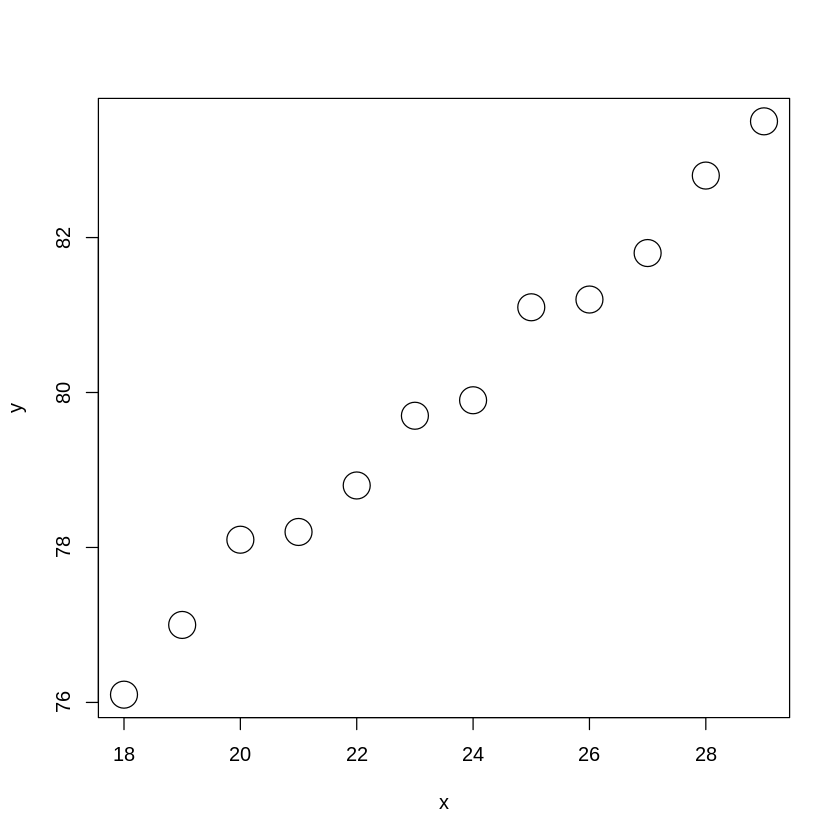

In [3]:
x = c(18,19,20,21,22,23,24,25,26,27,28,29)
y = c(76.1,77,78.1,78.2,78.8,79.7,79.9,81.1,81.2,81.8,82.8,83.5)

options(repr.plot.width=7, repr.plot.height=7)
plot(x, y, cex = 3)

In [4]:
cor(x,y) #spolczynnik korealcji Pearsona

[1] 0.9943661

In [5]:
lm.r = lm(y ~ x) #budujemy model regresji liniowej y=ax+b
print(summary(lm.r))


Call:
lm(formula = y ~ x)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.27238 -0.24248 -0.02762  0.16014  0.47238 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  64.9283     0.5084  127.71  < 2e-16 ***
x             0.6350     0.0214   29.66 4.43e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.256 on 10 degrees of freedom
Multiple R-squared:  0.9888,	Adjusted R-squared:  0.9876 
F-statistic:   880 on 1 and 10 DF,  p-value: 4.428e-11



In [6]:
print(coef(lm.r)) #same wspolczynniki

(Intercept)           x 
  64.928322    0.634965 


In [8]:
confint(lm.r, level = 0.95) #przedzial ufnosci dla parametrow modelu

,2.5 %,97.5 %
(Intercept),63.7955131,66.0611303
x,0.5872722,0.6826578


In [9]:
#przewidywanie nowych wartosci
predict(lm.r, data.frame(x = 28.5), level = 0.95, interval = "confidence")

,fit,lwr,upr
1,83.02483,82.73505,83.3146


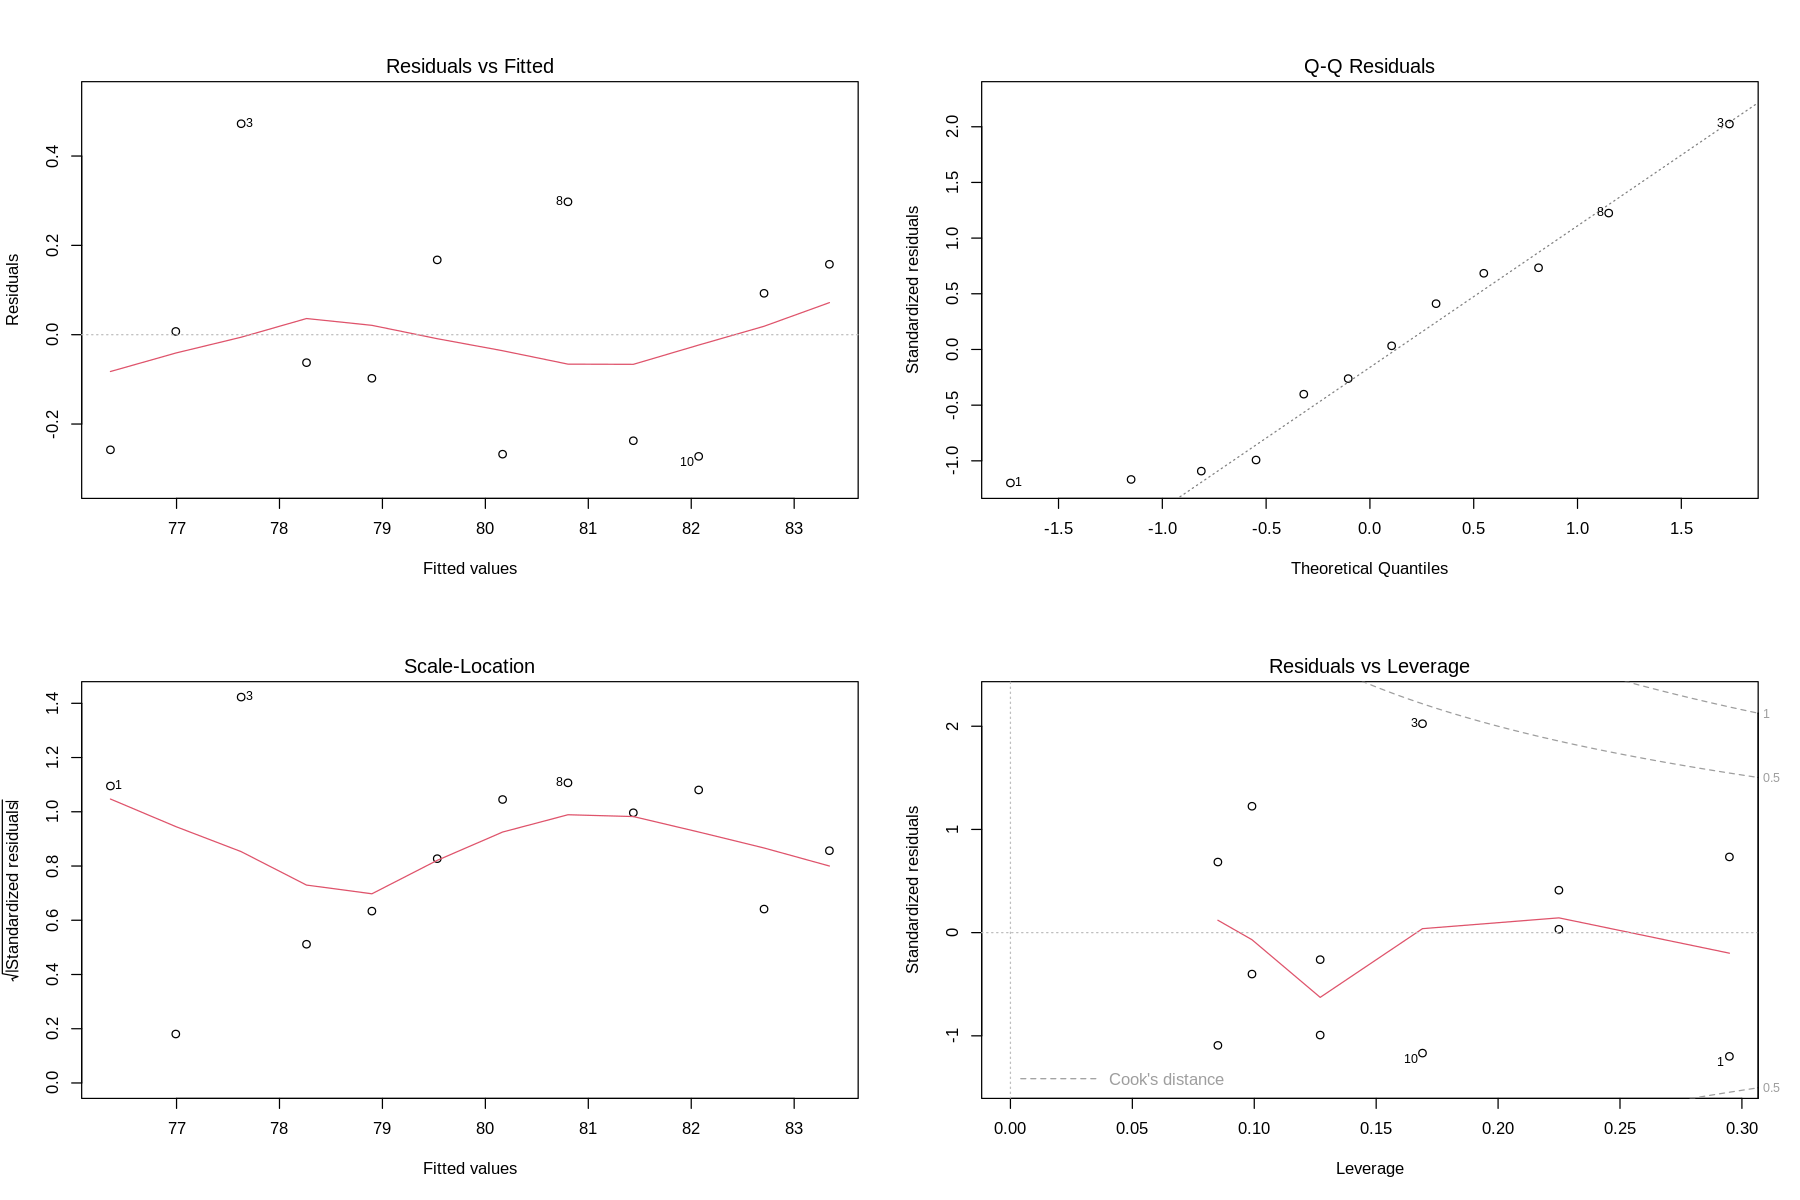

In [11]:
options(repr.plot.width=15, repr.plot.height=10)

par(mfrow = c(2, 2));
plot(lm.r)

Opis:

- residuals vs fitted: na osi OX oszacowane y_pred; na osi OY: y - y_pred; powinno być w okolicach 0 (w miare symetrycznie rozłożone)

- normal QQ: na osi OY kwantyle empiryczne dla standaryzowanych reszt

- scale location: na osi OX oszacowane y_pred; na osi OY: pierwiastki z modułów standarzyowanych reszt (powinny być równie rozłożone wokół czerwonej linii; ta nie powinna wykazywac zadnej tendencji --> stała wariancja)

- residuals vs laverage: do wykrywania obserwacji nietypowych; na osi OY standaryzowane reszty; na osi OX dźwignie $h_i$ (miara wpływu obserwacji na ocenę modelu). Warto rozważyć te przypadki, które wpadają poza czerwone, przerywane linie. Im większa wartość, tym bardziej dana obserwacja wpływa na wartości współczynnika regresji.

<h4> Zadanie1: Przeanalizuj dane $mass.txt$ zawierające informacje dotyczące masy ciała (trzecia kolumna) oraz masy mózgu (druga kolumna) dla pewnych ssaków.

- Narysuj wykresy pudełkowe dla drugiej i trzeciej kolumny. Czy zmienne wykazują rozkład normalny?

- Narysuj wykres zależności trzeciej kolumny od drugiej, zbuduj model regresji liniowej (szukamy zależności masy ciała w oparciu o masę mózgu)
  
- Przekształć wartości drugiej i trzeciej kolumny przez logarytm, a następnie narysuj wykresy pudełkowe dla obydwu cech oraz zbuduj model w oparciu o regresję liniową (szukamy zależności masy ciała w oparciu o masę mózgu; dane tym razem po zlogarytmowaniu),
  
- skomentuj otrzymane modele a następnie dokonaj ich diagnostyki,
    
- jaka by była masa ciała ssaka, którego masa mózgu wynosi 62 (wg obu modeli)?

* Rozważamy dane dotyczące wczasowiczów spędzających czas nad morzem w miejscowości $X$. Pierwsza cecha określa dzienną liczbę incydentów (takie jak wypadki/utonięcia), druga zawiera informacje o liczbie sprzedanych lodów w ciągu kolejnych dni.

In [15]:
x = c(56, 87, 92, 45, 87, 12, 102, 88, 17, 10) #liczba incydentow
y = c(267, 406, 485, 279, 417, 109, 538, 410, 58, 31) #liczba sprzedanych lodow

In [16]:
cor(x,y)

[1] 0.9831755

<h4> Regresja liniowa bez wyrazu wolnego

In [18]:
summary(lm(y ~ 0 + x )) #inna formula to x -1  (y = ax)


Call:
lm(formula = y ~ 0 + x)

Residuals:
   Min     1Q Median     3Q    Max 
-30.13 -25.02 -15.60  27.11  53.94 

Coefficients:
  Estimate Std. Error t value Pr(>|t|)    
x   5.0014     0.1534    32.6 1.18e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 33.42 on 9 degrees of freedom
Multiple R-squared:  0.9916,	Adjusted R-squared:  0.9907 
F-statistic:  1063 on 1 and 9 DF,  p-value: 1.183e-10


<h4> * Uzupełnienie: Jak wyliczne są te wartości? Rozważmy jeszcze jeden przykład.

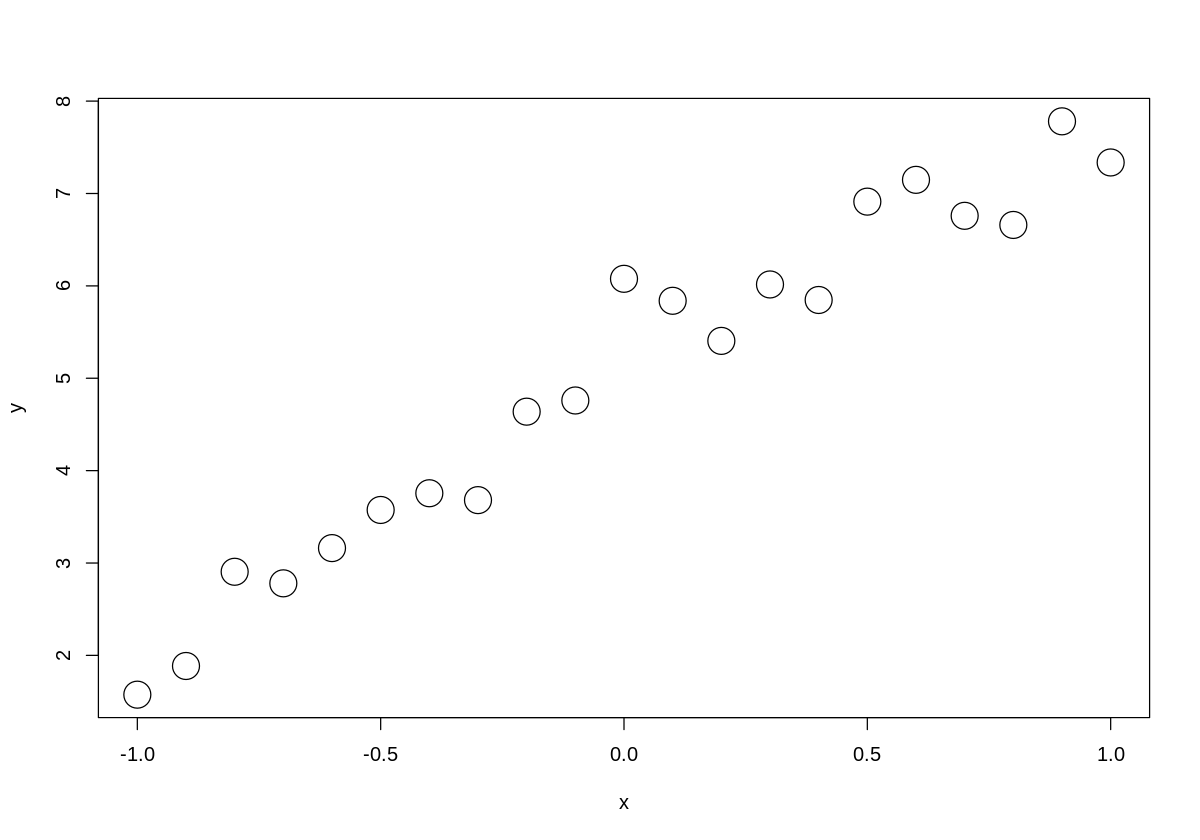

In [19]:
x = seq(-1,1,by=0.1)
y = 3*x+5+rnorm(length(x), 0, 0.5)

options(repr.plot.width=10, repr.plot.height=7)
plot(x,y, cex = 3)

In [20]:
n = length(x) #liczba danych
n

[1] 21

Cel: znalezienie zależności $y = ax+b$

In [21]:
#Jak znaleźć współczynniki a i b?
a = cor(x,y)*sd(y)/sd(x)
b = mean(y - a*x)
a; b

[1] 2.949989

[1] 4.975824

In [22]:
#R^2 - czyli wspolczynnik oceny stworzonego modelu

y_pred = a*x+b #przewidywane y
SSR = sum((y_pred-mean(y))^2)
SST = sum((y-mean(y))^2)
R2 = SSR/SST
R2

[1] 0.947647

W R wystarczy wykonać komendę:

In [23]:
model = lm(y~x)
summary(model)


Call:
lm(formula = y ~ x)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.67622 -0.30855 -0.04061  0.25253  1.10072 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.97582    0.09632   51.66  < 2e-16 ***
x            2.94999    0.15907   18.55 1.25e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4414 on 19 degrees of freedom
Multiple R-squared:  0.9476,	Adjusted R-squared:  0.9449 
F-statistic: 343.9 on 1 and 19 DF,  p-value: 1.251e-13


Pytanie: Czy wartości $y_{pred}$ z modelu przypominają rzeczywsite $y$? Liczymy $y-y_{pred} =: \epsilon$

In [24]:
ei = y - y_pred #wartosci resztowe (rezidua); powinny mieć średnią 0 i pochodzić z rozkładu normalnego (wtedy można stosować różnego rodzjau testy)

In [25]:
mean(ei) #praktycznie 0

[1] 2.008923e-16

In [26]:
summary(ei)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-0.67622 -0.30855 -0.04061  0.00000  0.25253  1.10072 

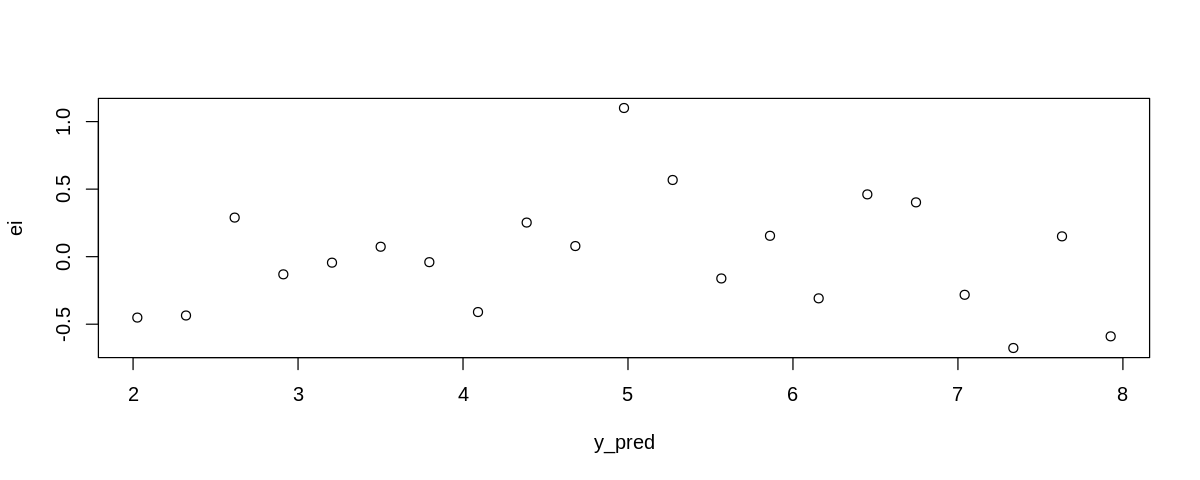

In [38]:
options(repr.plot.width=10, repr.plot.height=4)
plot(y_pred, ei) #zaleznosc reszt od wartosci przewidzianych

In [31]:
shapiro.test(ei)


	Shapiro-Wilk normality test

data:  ei
W = 0.96822, p-value = 0.6934


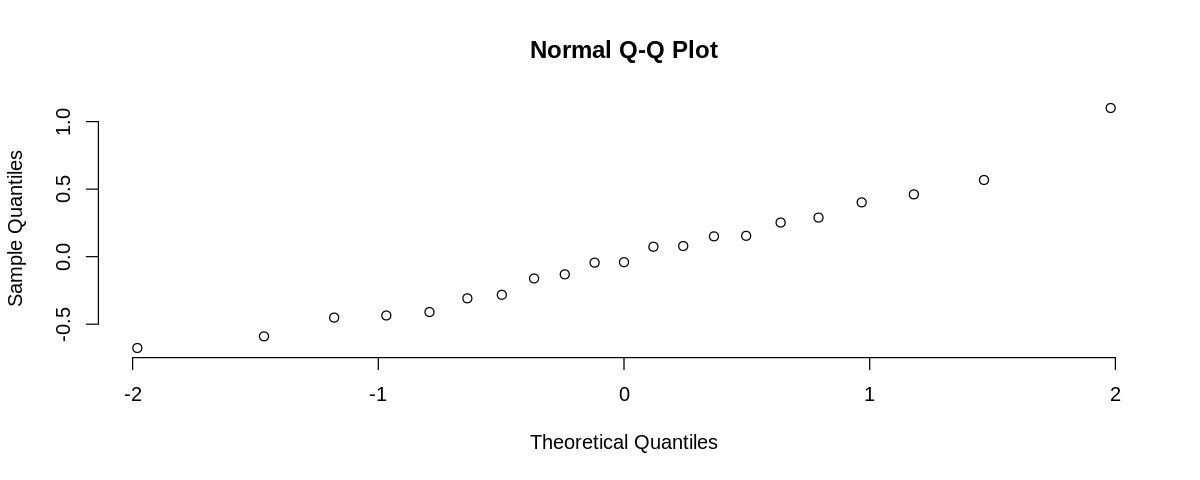

In [32]:
qqnorm(ei, pch = 1, frame = FALSE)

In [33]:
Su = sqrt(sum(ei^2)/(n-2)) #odchylenie standardowe składnika resztowego (Residual standard error)
print(Su)

[1] 0.4414043


Dźwignia: $h_i = \frac{1}{n}+\frac{(x_i-\overline{x})^2}{\sum_j (x_j-\overline{x})^2}$

In [34]:
dzwignia = 1/n + (x-mean(x))^2/sum((x-mean(x))^2)

In [35]:
Sei = Su*sqrt(1 - (dzwignia)) #blędy standardowe kolejnych reziduum

In [36]:
ri = ei/Sei #standaryzowane reszty

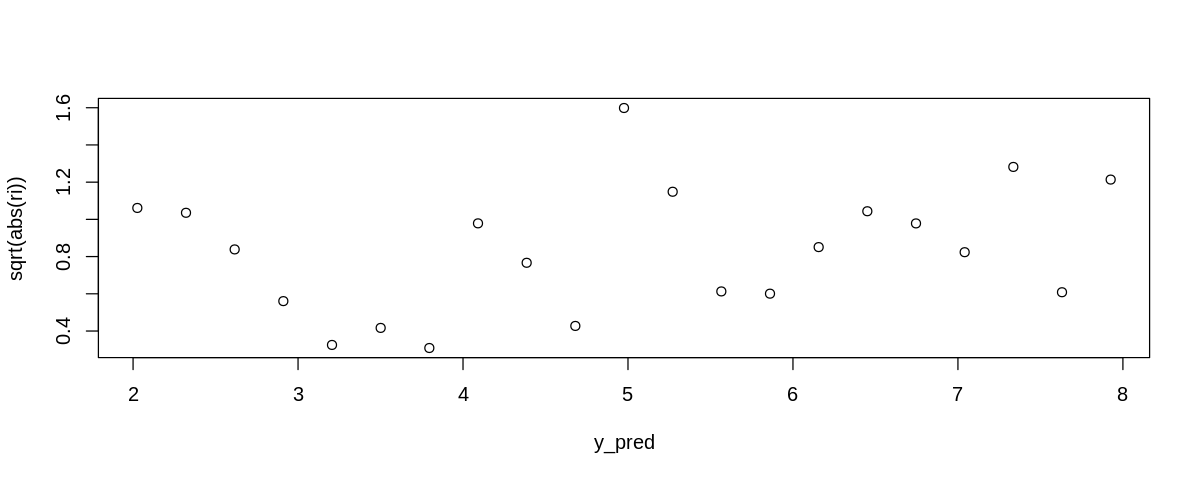

In [37]:
plot(y_pred, sqrt(abs(ri))) #zaleznosc pierwiastkow ze standarzyowanych reszt od y_pred

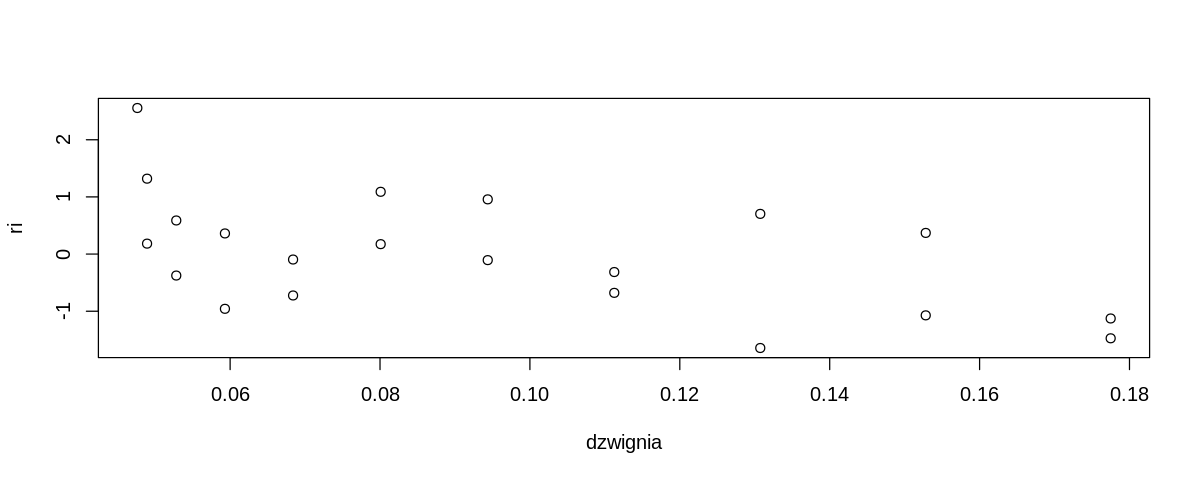

In [39]:
plot(dzwignia, ri)

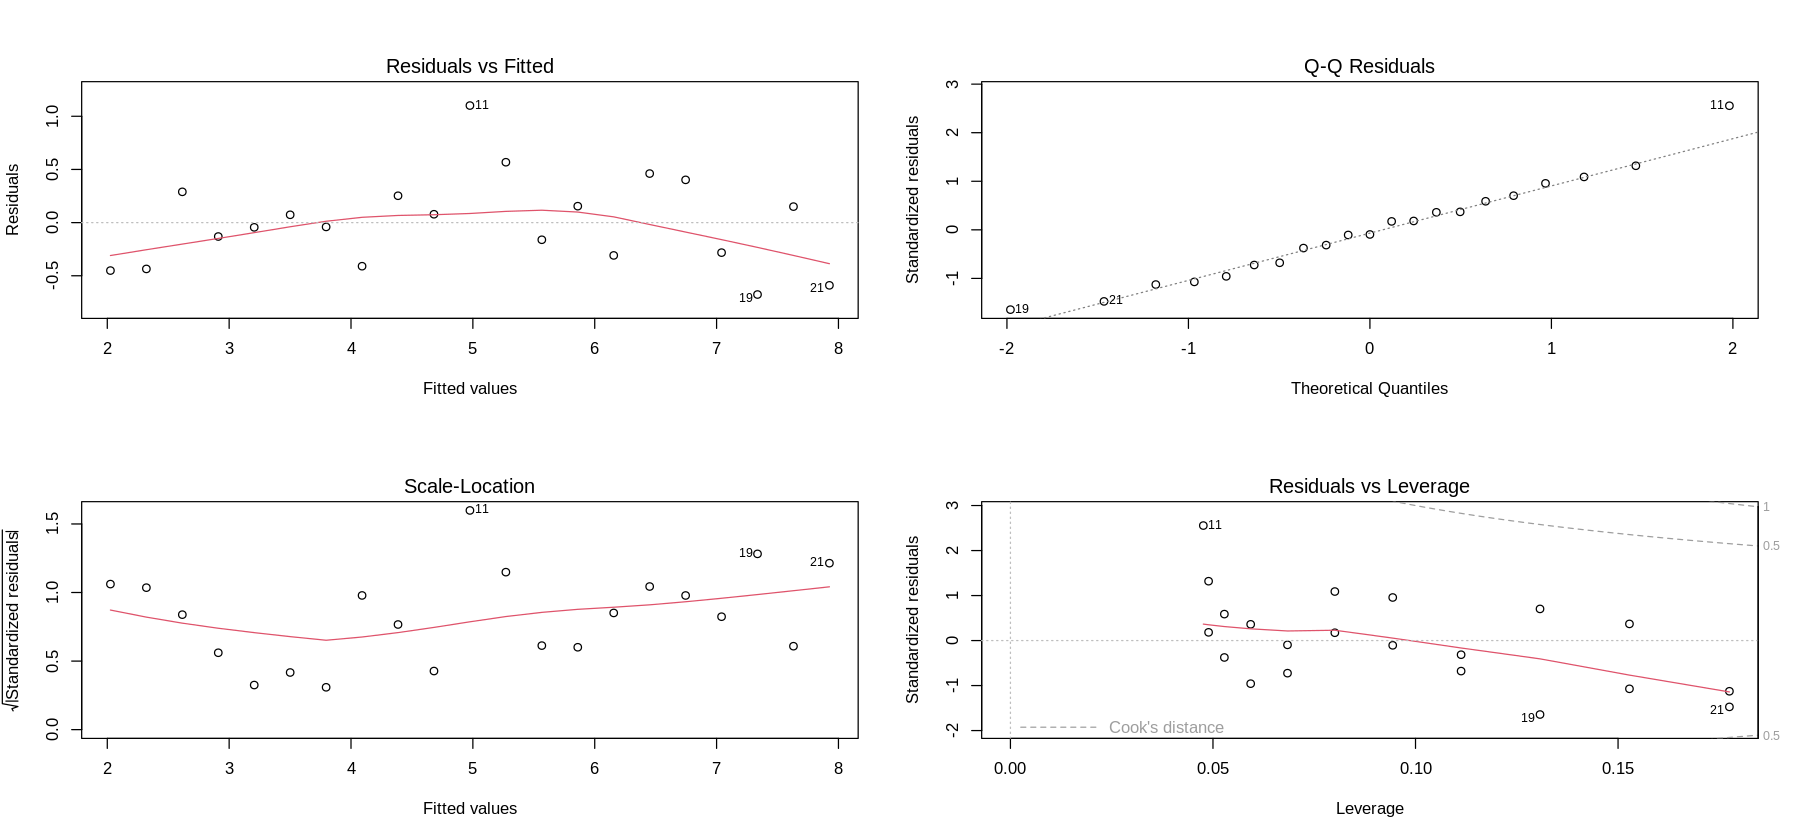

In [41]:
options(repr.plot.width=15, repr.plot.height=7)

par(mfrow = c(2, 2));
plot(model) #wsystkie wykresy co wyzej mozna zrealizowac za pomocą komendy

<h4> * Koniec uzupełnienia

* Dlaczego w modelu $y=ax+b + \varepsilon$ możemy zawsze założyć, że $\varepsilon$ ma wartość oczekiwaną 0?

<h4> Obserwacje odstające i wpływowe

- obserwacje odstające - te które mają duże reszty,
- obserwacje wpływowe - te, których usunięcie prowadzi do znacząco różnych oszacowanych parametrów

Chociaż często używamy tych pojęć zamiennie, należy zwrócić uwagę że nie są one tożsame!

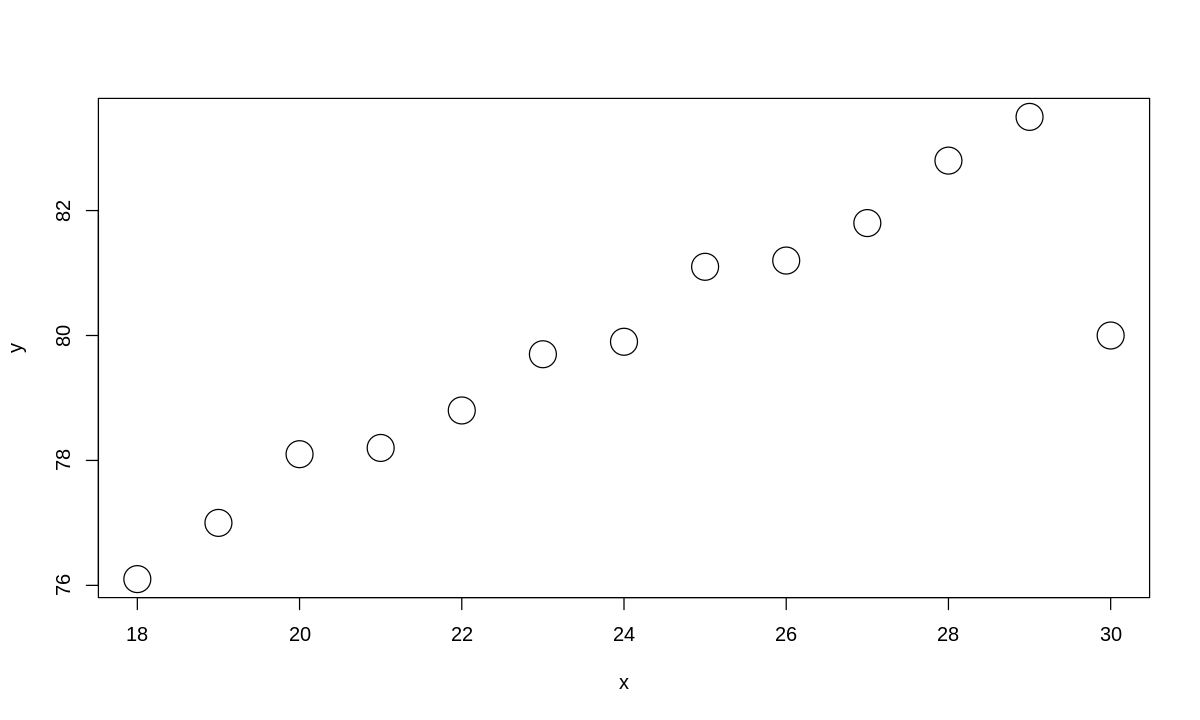

In [46]:
x = c(18,19,20,21,22,23,24,25,26,27,28,29,30)
y = c(76.1,77,78.1,78.2,78.8,79.7,79.9,81.1,81.2,81.8,82.8,83.5,80)

options(repr.plot.width=10, repr.plot.height=6)
plot(x, y, cex = 3)

In [43]:
cor(x,y)

[1] 0.8899893

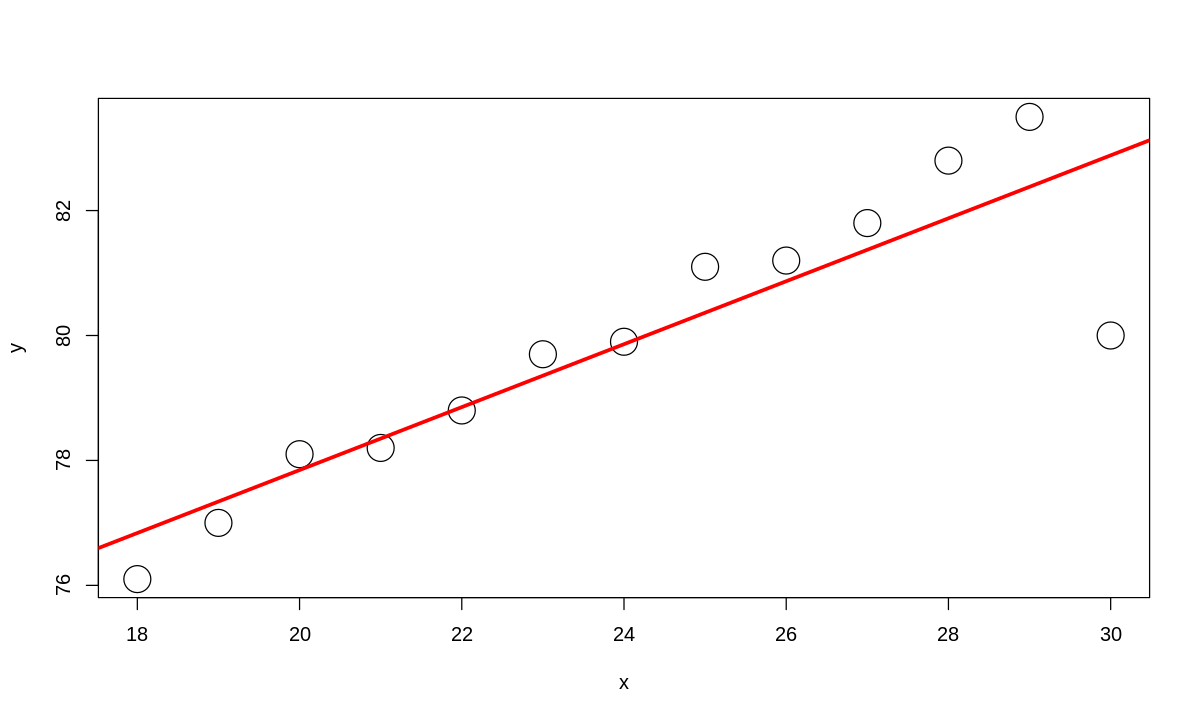

In [50]:
model = lm(y~x)
plot(x, y, cex = 3)
abline(model, col = "red", lwd = 3)

In [51]:
summary(model)


Call:
lm(formula = y ~ x)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.8846 -0.1500  0.2539  0.4269  1.1192 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 67.76923    1.89056  35.846 9.58e-13 ***
x            0.50385    0.07783   6.473 4.59e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.05 on 11 degrees of freedom
Multiple R-squared:  0.7921,	Adjusted R-squared:  0.7732 
F-statistic: 41.91 on 1 and 11 DF,  p-value: 4.592e-05


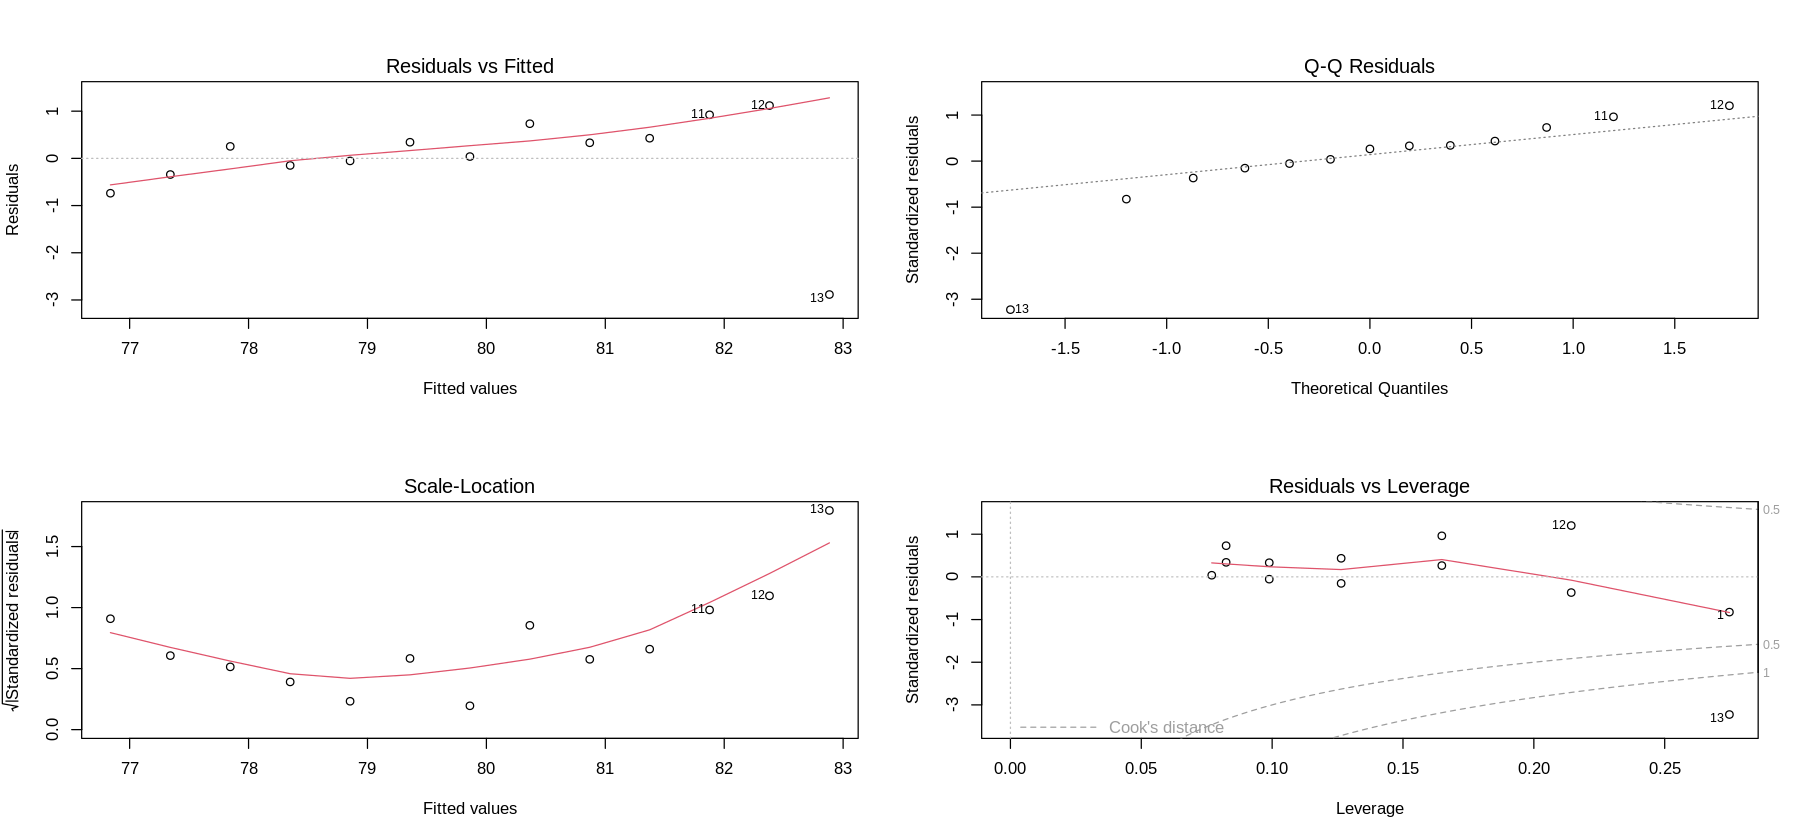

In [52]:
options(repr.plot.width=15, repr.plot.height=7)

par(mfrow = c(2, 2));
plot(model)

In [53]:
n = length(x)
y_pred = 0.50385*x+67.76923
ei = y - y_pred
Su = sqrt(sum(ei^2)/(n-2))
dzwignia = 1/n + (x-mean(x))^2/sum((x-mean(x))^2)
Sei = Su*sqrt(1 - (dzwignia))
ri = ei/Sei

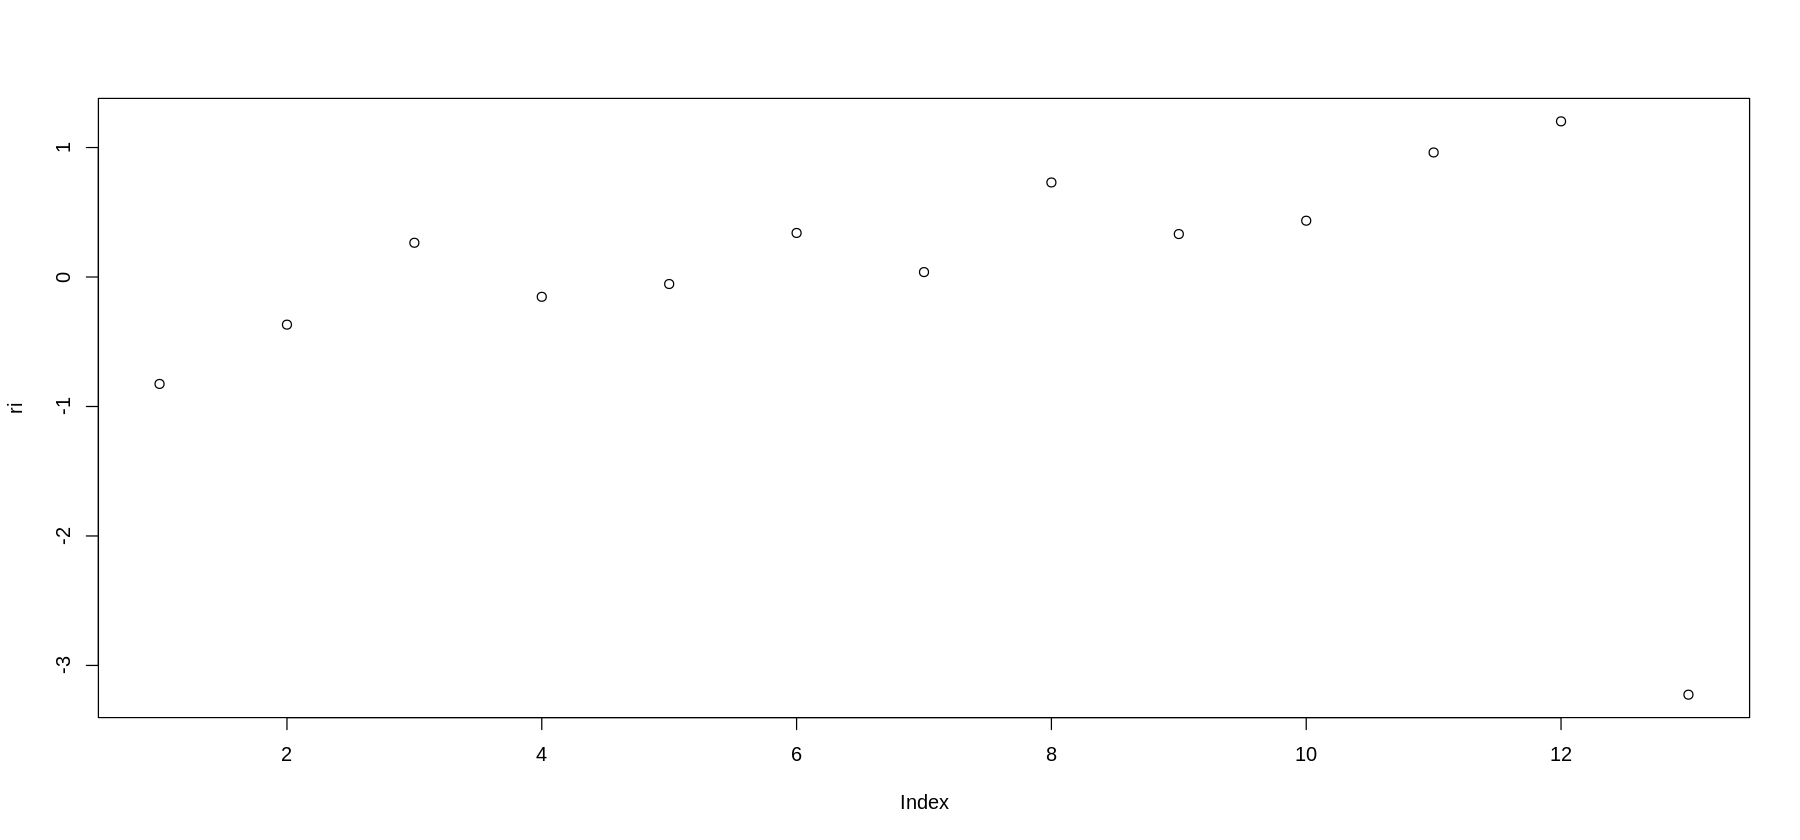

In [54]:
plot(ri) #wykres standaryzowanych reszt

Metoda 1

In [55]:
#bezposrednio
t = ri*sqrt((n-1-2)/(n-1-1-ri^2)) #studentyzowana reszta; ma rozkład t-studenta (same standaryzowane reszty nie mają "ladnego rozkladu")
t

[1]  -0.81305726  -0.35291320   0.25295497  -0.14595739  -0.05159481
 [6]   0.32612508   0.03626648   0.71379967   0.31790410   0.41826543
[11]   0.95825738   1.23011613 -13.24273385

In [56]:
#zaimplementowana w R
jack = rstudent(model) #pozwala znajdywac obserwacje odstajace; posrednio moze wskazywac na obserwacje wplywowe (jezeli są odstające)
jack

1            2            3            4            5            6 
 -0.81297691  -0.35283774   0.25303137  -0.14587942  -0.05151457   0.32620954 
           7            8            9           10           11           12 
  0.03635301   0.71389709   0.31800047   0.41836822   0.95837859   1.23025632 
          13 
-13.23299179

In [57]:
jack[which.max(abs(jack))] #gdzie najwieksza wartosc?

13 
-13.23299

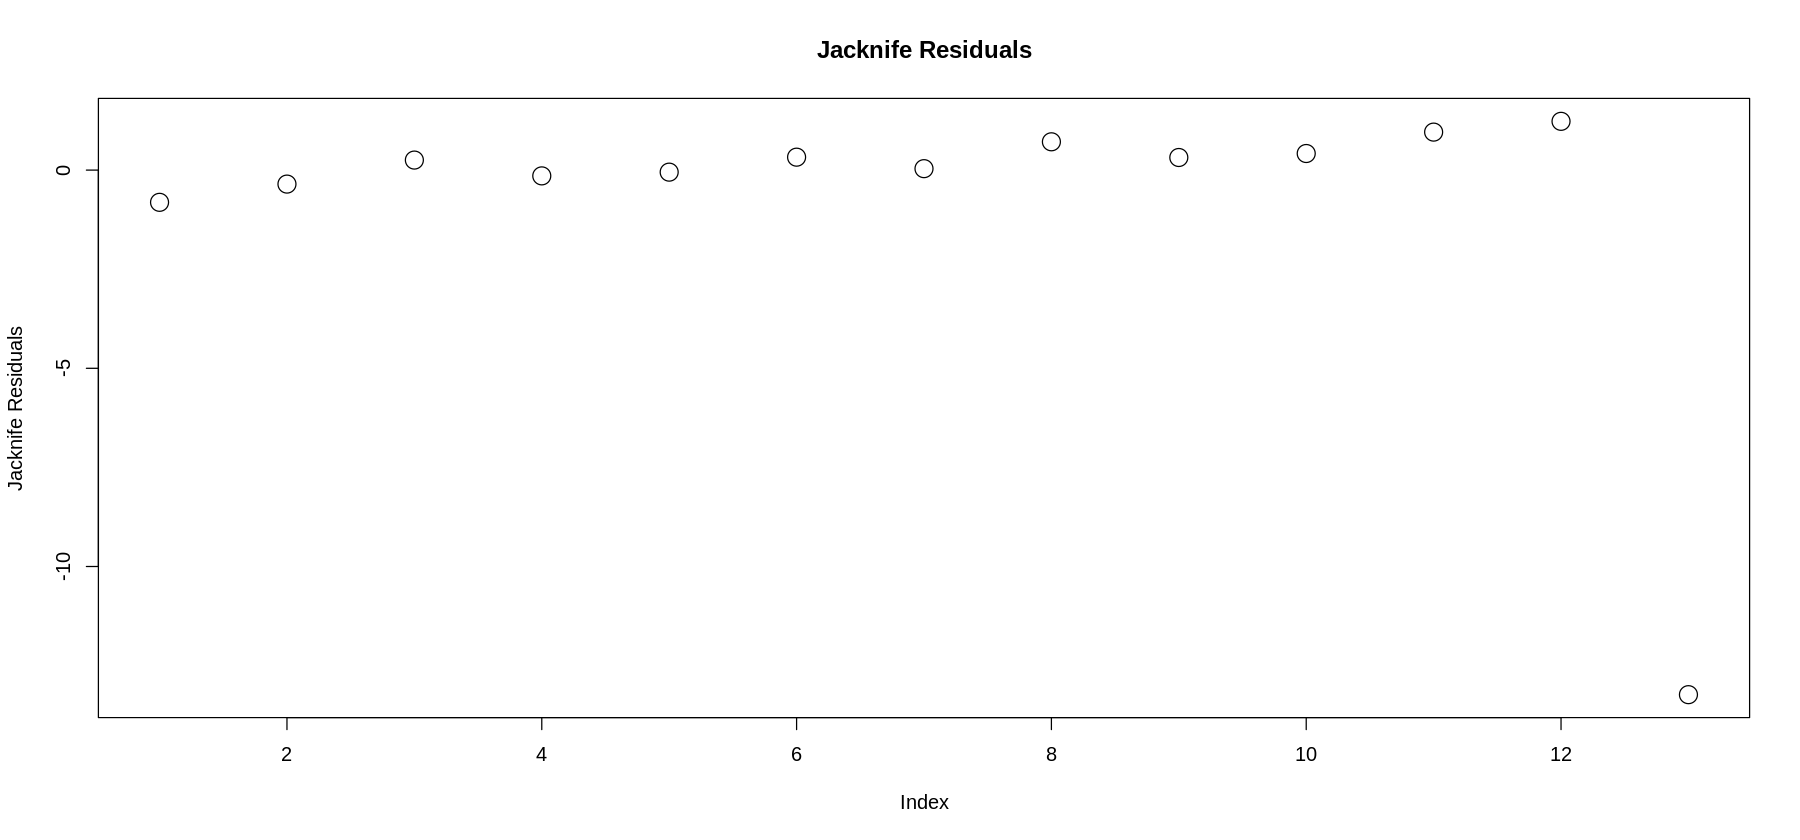

In [62]:
plot(jack, ylab="Jacknife Residuals", main="Jacknife Residuals", cex = 2)

In [66]:
library(car)
outlierTest(model)

    rstudent unadjusted p-value Bonferroni p
13 -13.23299         1.1586e-07   1.5062e-06

Metoda 2

In [67]:
cutoff = 4/(n-length(model$coefficients)-2) #graniczny poziom  4/(n-k-2)

print(cutoff)

[1] 0.4444444


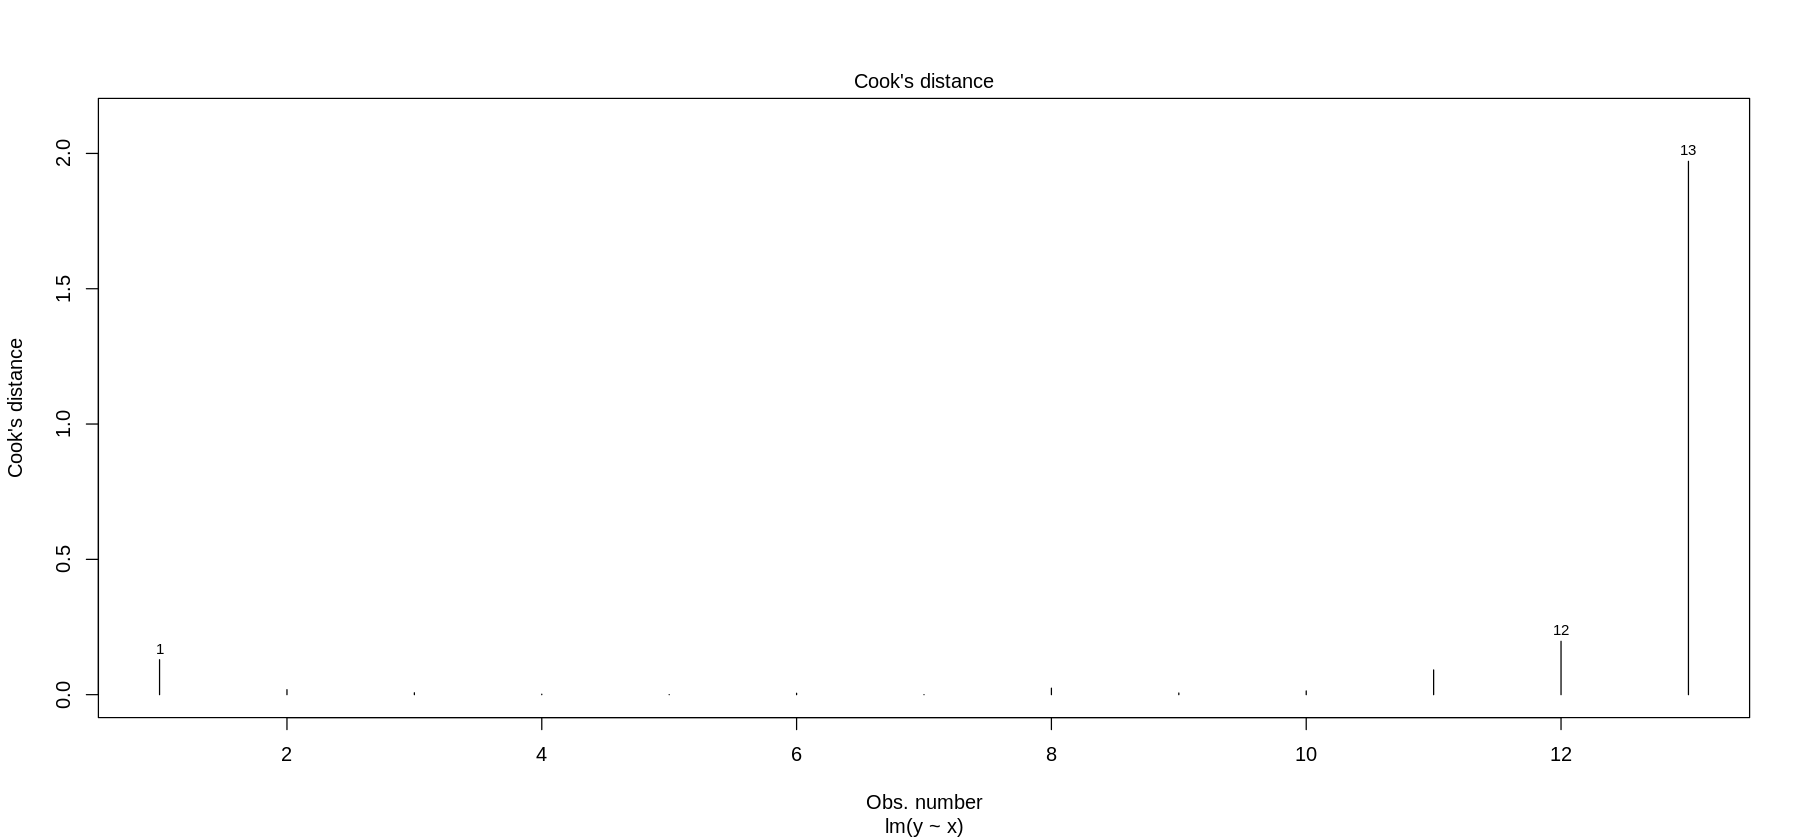

In [68]:
plot(model, which=4, cook.levels=cutoff) #odleglosc cooka, mierzy jak usunięcie danej obserwacji wplywa na wspolczynniki modelu (dokladniej na y_pred), jest proporcjonalna do (y_predALL - y_pred)^2, jak wysoka to obserwacja jest wplywowa

,StudRes,Hat,CookD
,<dbl>,<dbl>,<dbl>
1,-0.8129769,0.2747253,0.1291576
12,1.2302563,0.2142857,0.1971850
13,-13.2329918,0.2747253,1.9707889


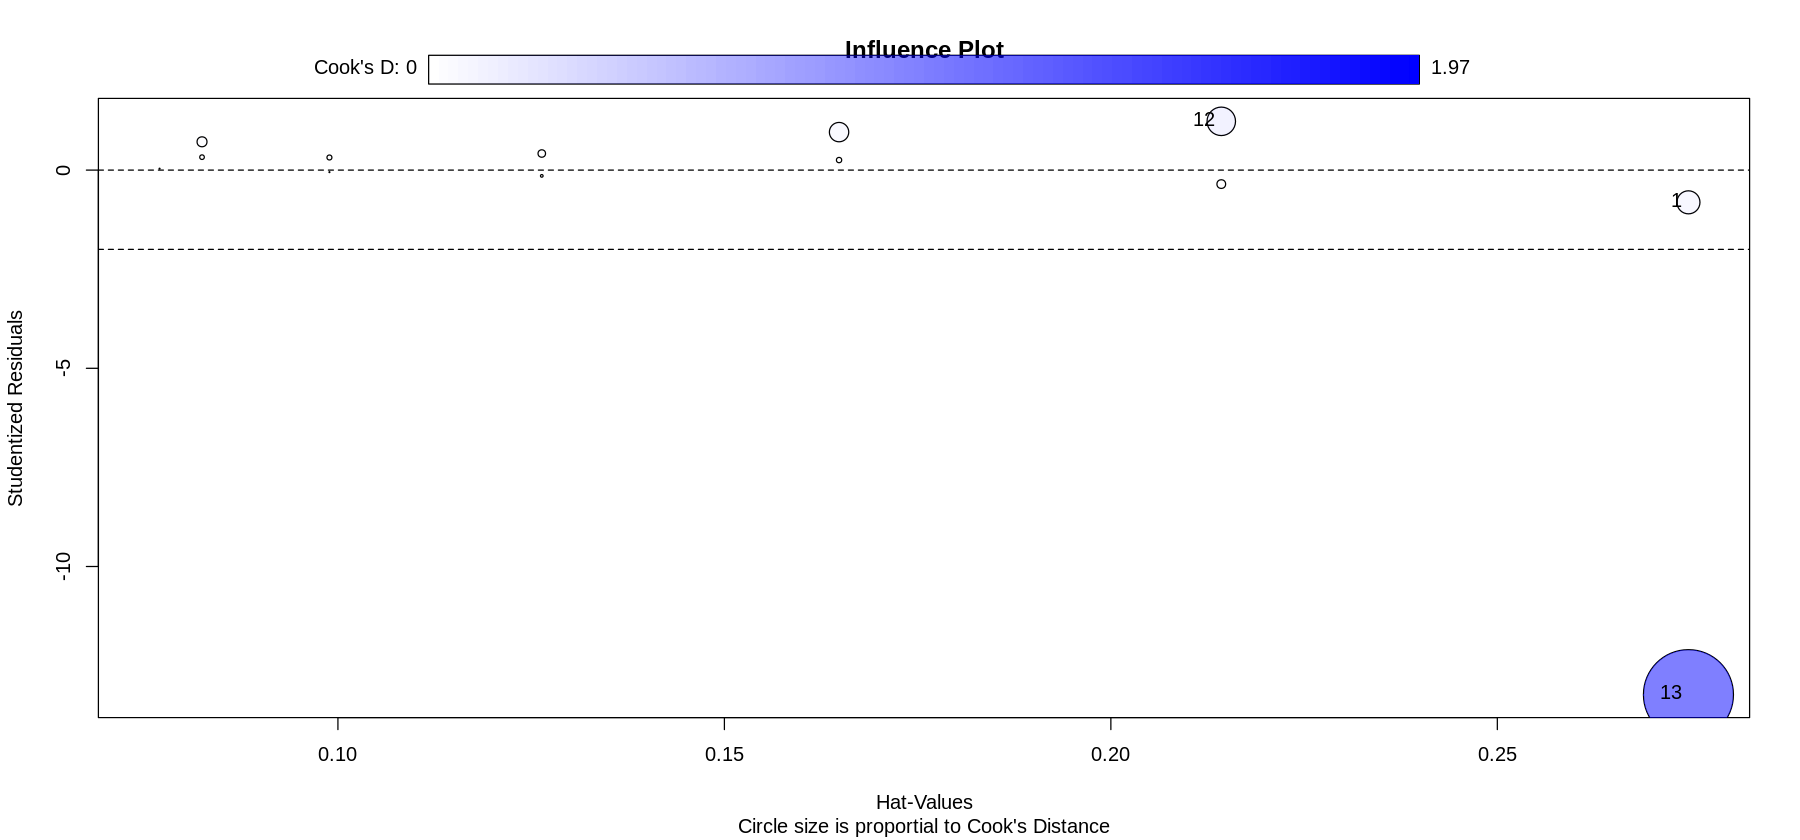

In [69]:
influencePlot(model, main="Influence Plot",sub="Circle size is proportial to Cook's Distance") #wymaga "car"

odstająca - daleko od 0 na osi OY

duża dźwignia - na prawo na osi OX

wpływowość - wielkość koła

Metoda 3

In [70]:
influence.measures(model) #to co wczesniej + pare innych rzeczy

Influence measures of
	 lm(formula = y ~ x) :

     dfb.1_     dfb.x   dffit   cov.r   cook.d    hat inf
1  -0.46028  4.25e-01 -0.5004 1.46789 1.29e-01 0.2747    
2  -0.16277  1.48e-01 -0.1843 1.50236 1.84e-02 0.2143    
3   0.09294 -8.21e-02  0.1124 1.43044 6.91e-03 0.1648    
4  -0.04096  3.47e-02 -0.0555 1.37916 1.69e-03 0.1264    
5  -0.01027  8.05e-03 -0.0171 1.34209 1.60e-04 0.0989    
6   0.03949 -2.52e-02  0.0978 1.29106 5.20e-03 0.0824    
7   0.00162 -3.15e-18  0.0105 1.31049 6.06e-05 0.0769    
8  -0.02274  5.52e-02  0.2140 1.19389 2.40e-02 0.0824    
9  -0.03476  4.97e-02  0.1054 1.31605 6.04e-03 0.0989    
10 -0.07922  9.95e-02  0.1591 1.33779 1.37e-02 0.1264    
11 -0.26242  3.11e-01  0.4258 1.21531 9.13e-02 0.1648    
12 -0.44896  5.14e-01  0.6425 1.16173 1.97e-01 0.2143    
13  6.16437 -6.91e+00 -8.1443 0.00487 1.97e+00 0.2747   *

<h4> Robust LM

In [71]:
library(MASS)
summary(rr.huber <- rlm(y ~ x )) #porownaj wsp ze standardową regresją


Call: rlm(formula = y ~ x)
Residuals:
     Min       1Q   Median       3Q      Max 
-3.81423 -0.16761 -0.07439  0.21685  0.44115 

Coefficients:
            Value    Std. Error t value 
(Intercept)  65.3481   0.6286   103.9525
x             0.6155   0.0259    23.7839

Residual standard error: 0.3214 on 11 degrees of freedom

<h4> Zadanie2: Zbuduj model regresji liniowej. Poszukujemy zależności wartości odżywczych płatków (rating) od zawartości cukrów (sugars). Dokładniej:

- Oblicz i zinterpretuj współczynnik korelacji.
- Zbuduj model liniowy, skomentuj otrzymane parametry oraz dokonaj wstępęj diagnostyki modelu.
- Jaka będzie przewidywana wartość odżywcza płatków z zerową zawartością cukrów?
- O ile wzrośnie lub zmaleje wartość odżywcza płatków jeżeli zawartość cukrów wzrośnie o 1 gram?
- Wyznacz obserwacje odstające/wpłyowe.

In [76]:
library(liver)
data(cereal)
head(cereal)

,name,manuf,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,100% Bran,N,cold,70,4,1,130,10.0,5.0,6,280,25,3,1,0.33,68.40297
2,100% Natural Bran,Q,cold,120,3,5,15,2.0,8.0,8,135,0,3,1,1.00,33.98368
3,All-Bran,K,cold,70,4,1,260,9.0,7.0,5,320,25,3,1,0.33,59.42551
4,All-Bran with Extra Fiber,K,cold,50,4,0,140,14.0,8.0,0,330,25,3,1,0.50,93.70491
5,Almond Delight,R,cold,110,2,2,200,1.0,14.0,8,-1,25,3,1,0.75,34.38484
6,Apple Cinnamon Cheerios,G,cold,110,2,2,180,1.5,10.5,10,70,25,1,1,0.75,29.50954


<h4> Nieliniowe zależności


Call:
lm(formula = y ~ x)

Residuals:
   Min     1Q Median     3Q    Max 
-36681 -29267  -8247  23607  84747 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -83749.9    12787.3  -6.549 1.01e-07 ***
x            11346.2      913.7  12.418 6.00e-15 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 33350 on 38 degrees of freedom
Multiple R-squared:  0.8023,	Adjusted R-squared:  0.7971 
F-statistic: 154.2 on 1 and 38 DF,  p-value: 6.002e-15


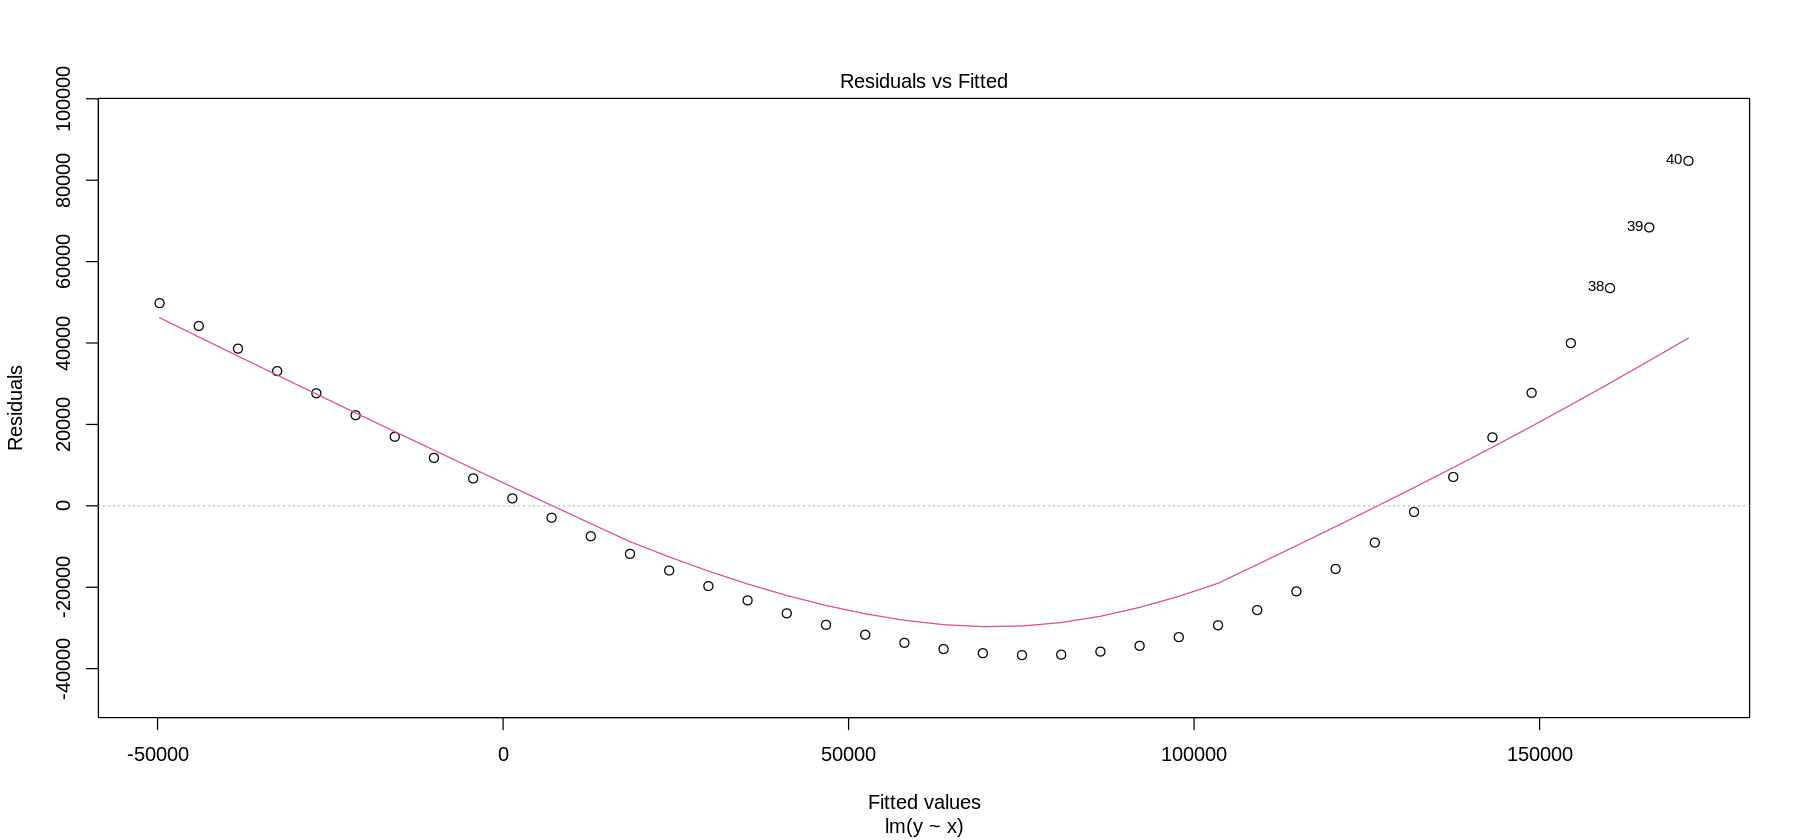

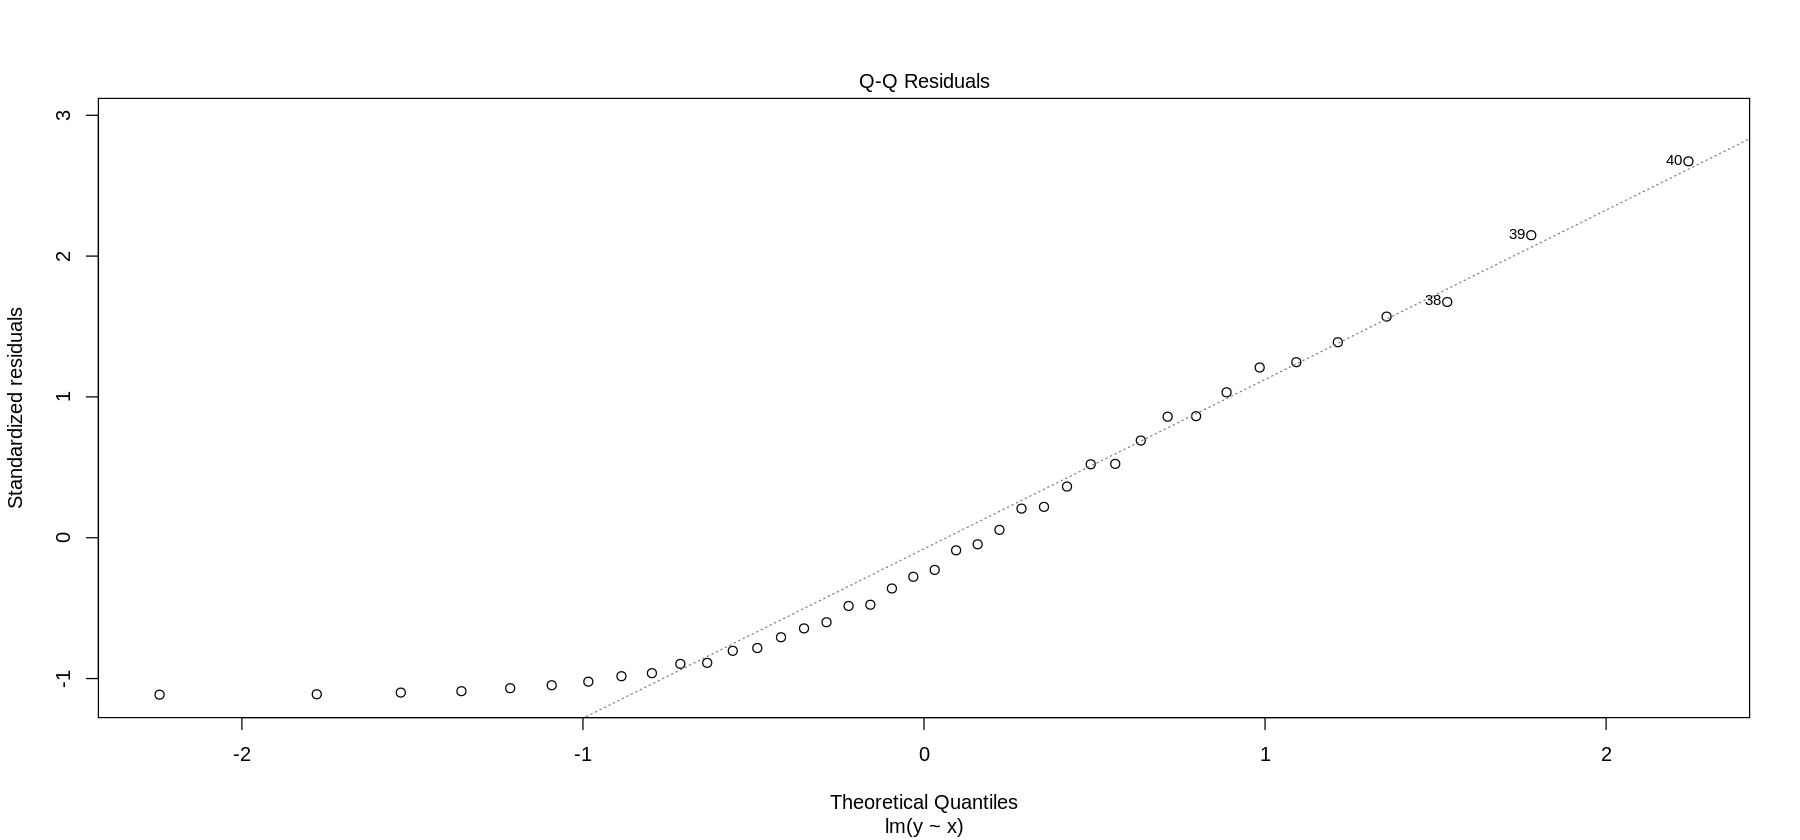

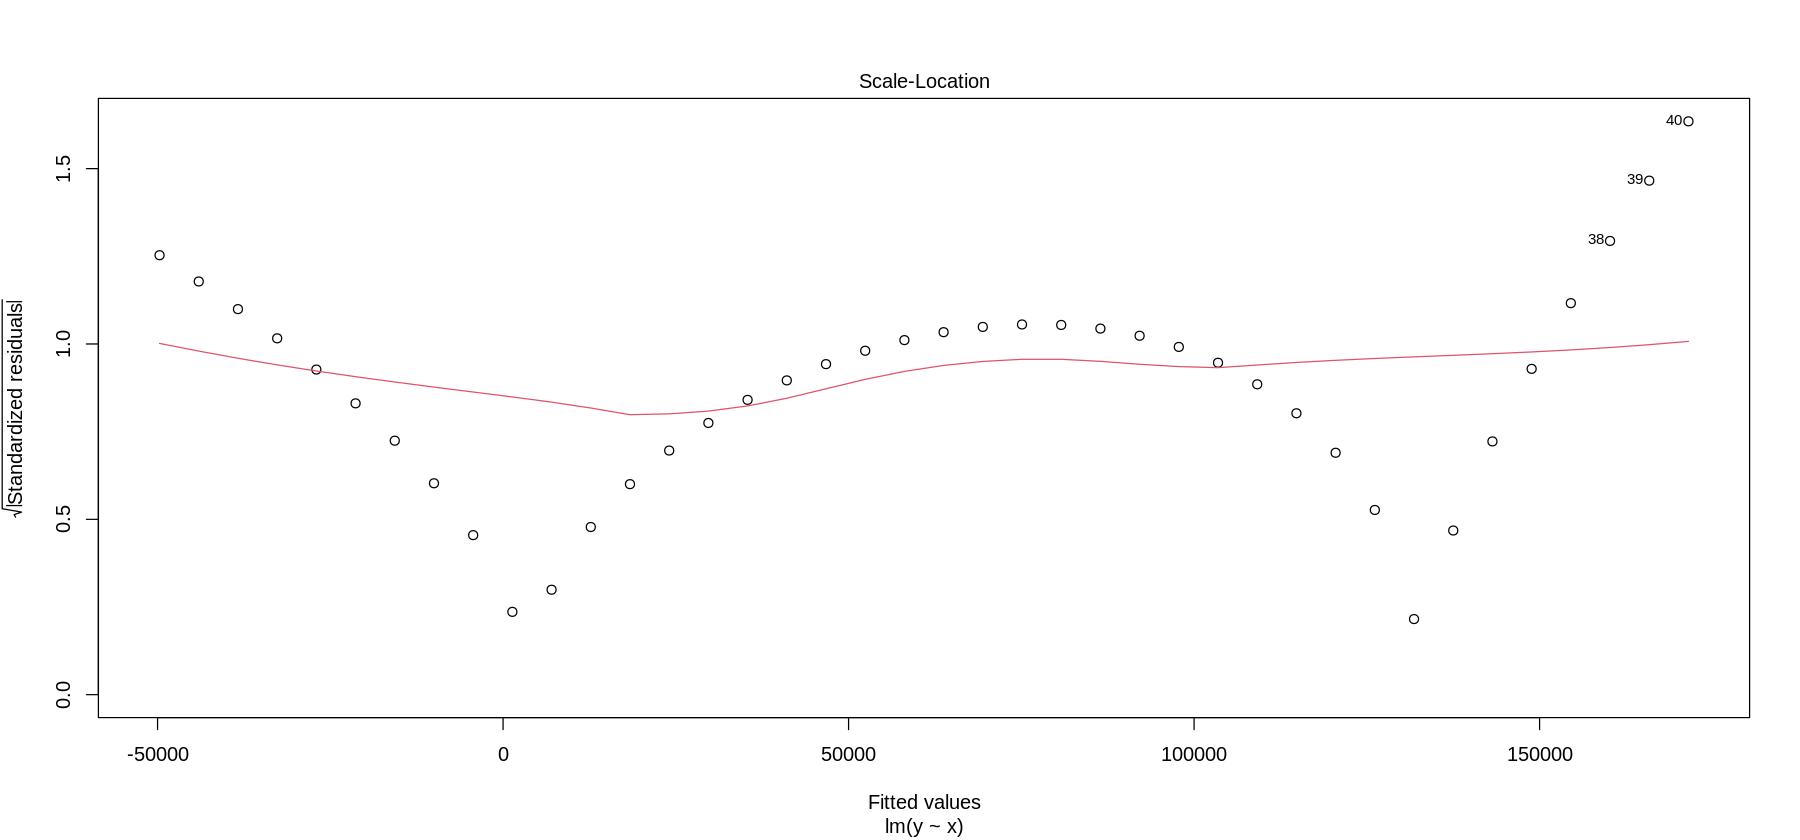

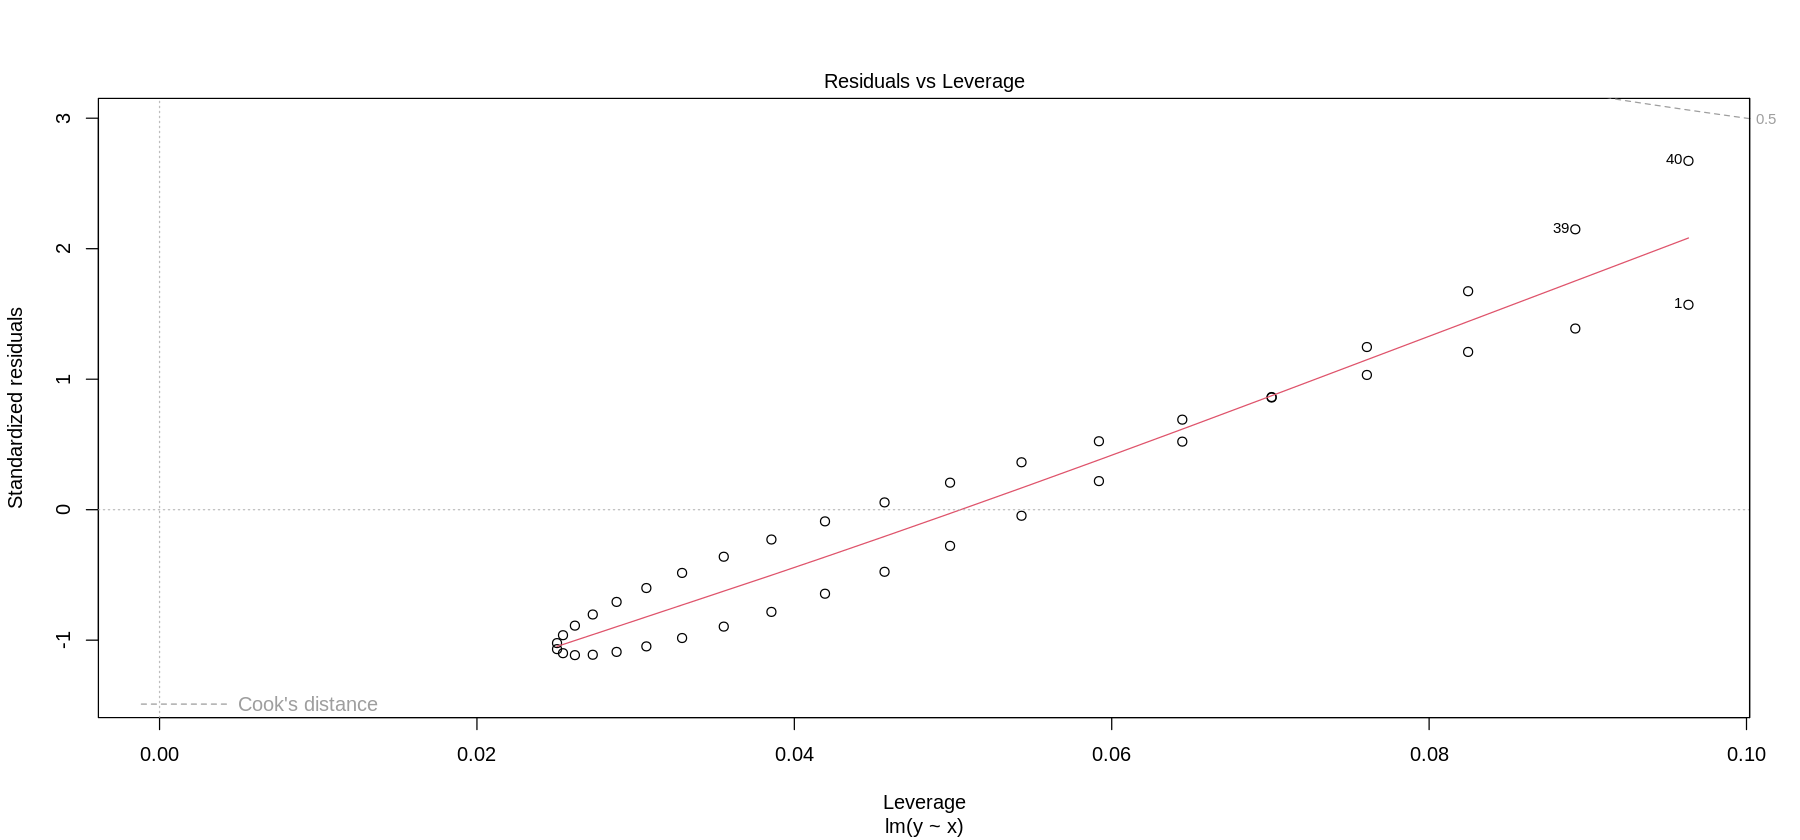

[1] 0.2626263


Call:
lm(formula = ((y^lambda - 1)/lambda) ~ x)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.32532 -0.26482 -0.08625  0.21105  0.69921 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -6.085576   0.115709  -52.59   <2e-16 ***
x            4.533763   0.008268  548.38   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3018 on 38 degrees of freedom
Multiple R-squared:  0.9999,	Adjusted R-squared:  0.9999 
F-statistic: 3.007e+05 on 1 and 38 DF,  p-value: < 2.2e-16


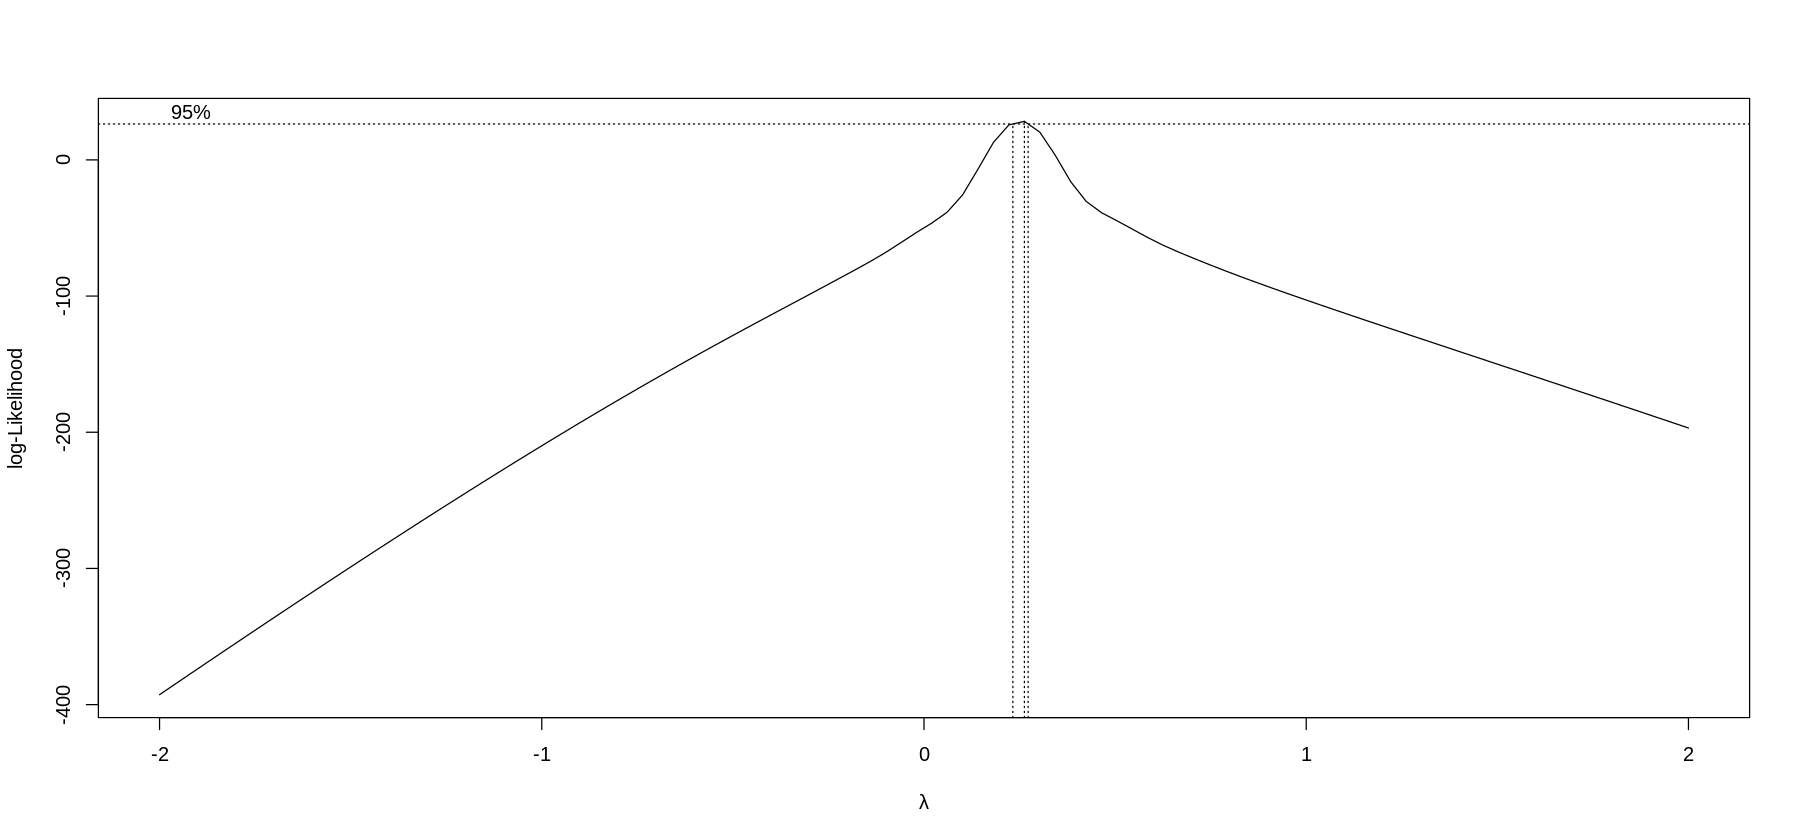

In [77]:
library(MASS)

x = seq(3, 22.5, by = 0.5)
y = x^4 + rnorm(40)

model <- lm(y~x) #buduje model liniowy
summary(model)
plot(model)

#szukam odpowiedniej transformacji (potęgi)
bc <- boxcox(y ~ x)
(lambda <- bc$x[which.max(bc$y)])

new_model <- lm(((y^lambda-1)/lambda) ~ x)
summary(new_model)

<h4> Zamiast dokonywać transformacji można też tak:

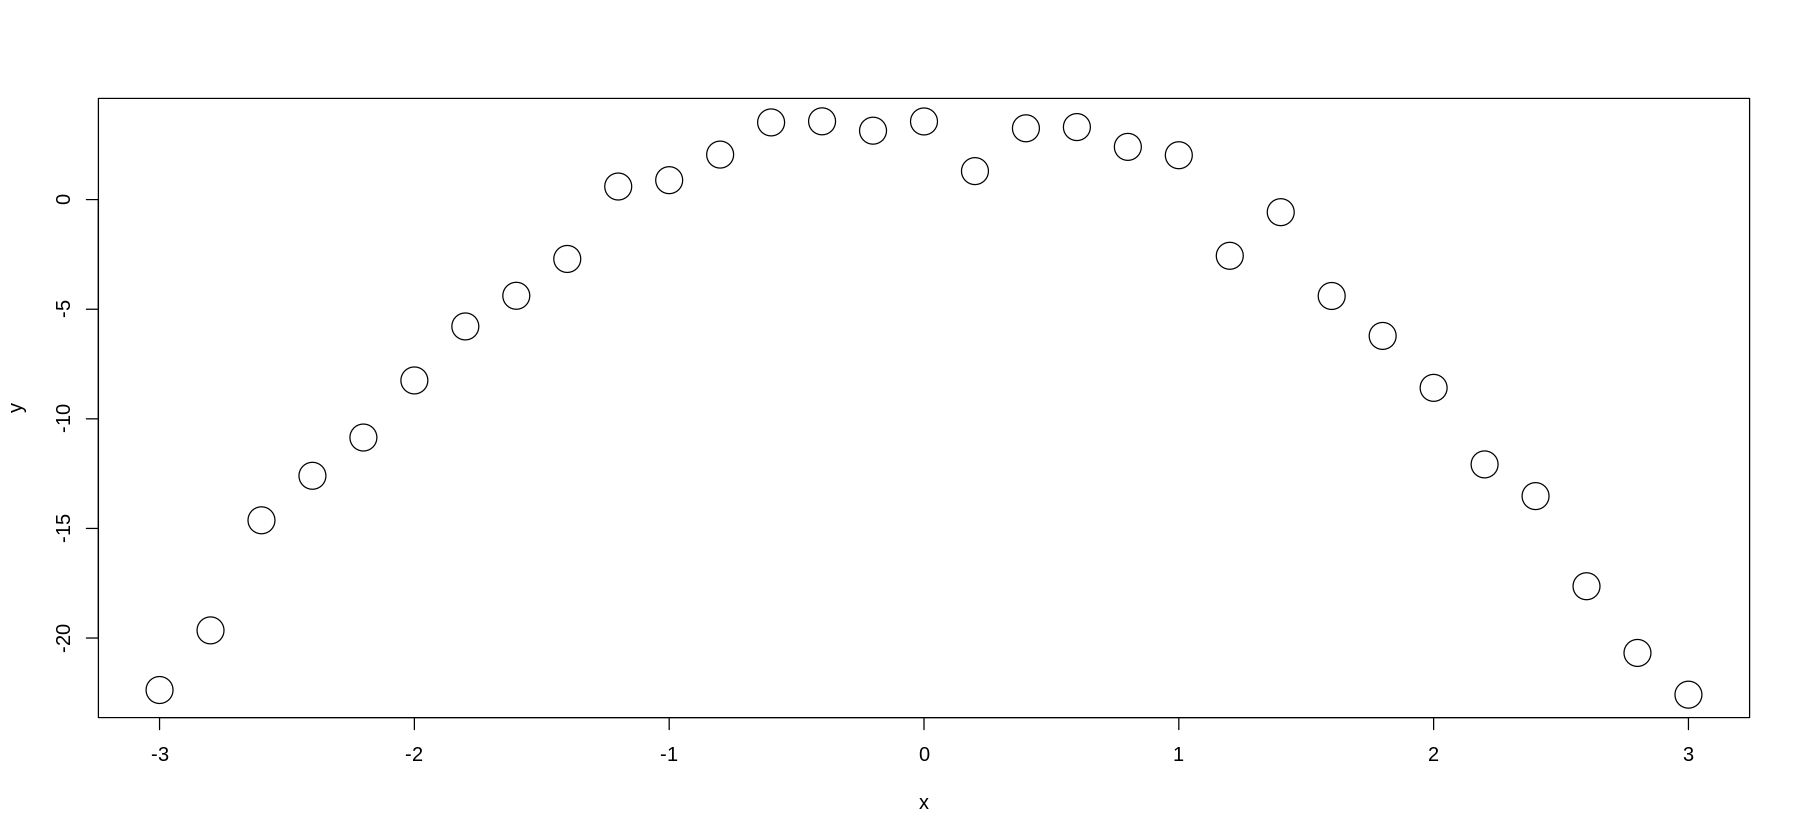

In [79]:
x = seq(-3, 3, by=0.2)
y = -3*x^2 + 4+ rnorm(length(x))

options(repr.plot.width=15, repr.plot.height=7)
plot(x, y, cex = 3)

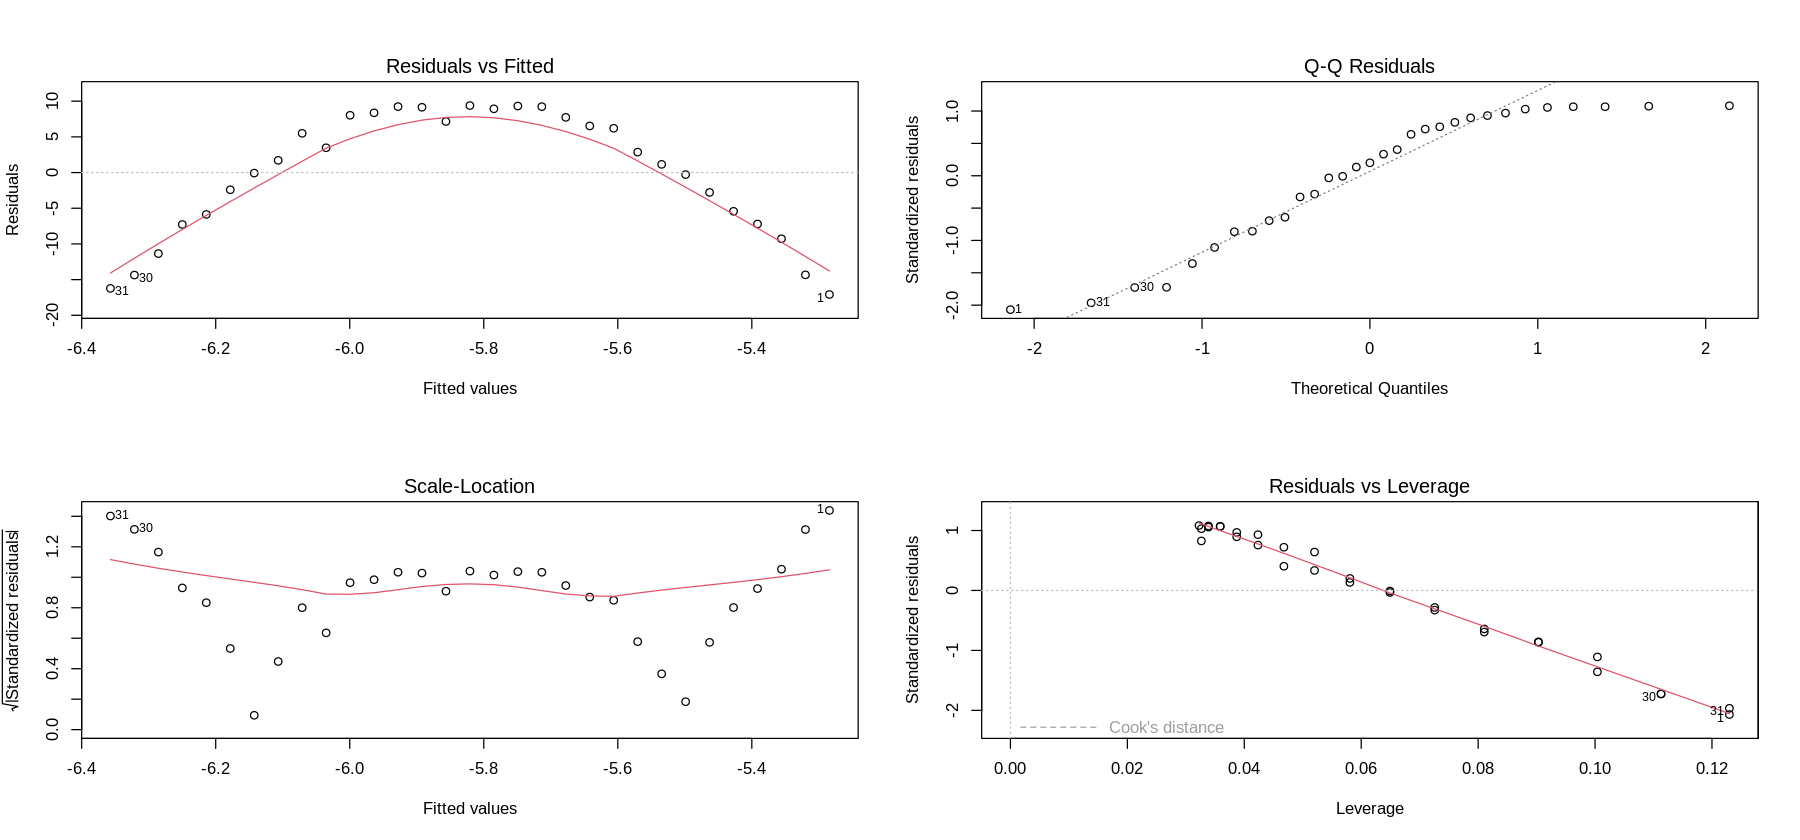

In [81]:
#tutaj zwykly model liniowy y =ax+b, widzimy po wykresach ze nie jest to najlepszy opis danych
options(repr.plot.width=15, repr.plot.height=7)
par(mfrow = c(2, 2));
plot(lm(y~x))

In [82]:
#model y = ax^2+b
summary(lm(y~I(x^2)))


Call:
lm(formula = y ~ I(x^2))

Residuals:
     Min       1Q   Median       3Q      Max 
-2.25880 -0.44016 -0.05362  0.64644  1.75899 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.67726    0.25959   14.16 1.46e-14 ***
I(x^2)      -2.96810    0.06051  -49.05  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9627 on 29 degrees of freedom
Multiple R-squared:  0.9881,	Adjusted R-squared:  0.9877 
F-statistic:  2406 on 1 and 29 DF,  p-value: < 2.2e-16


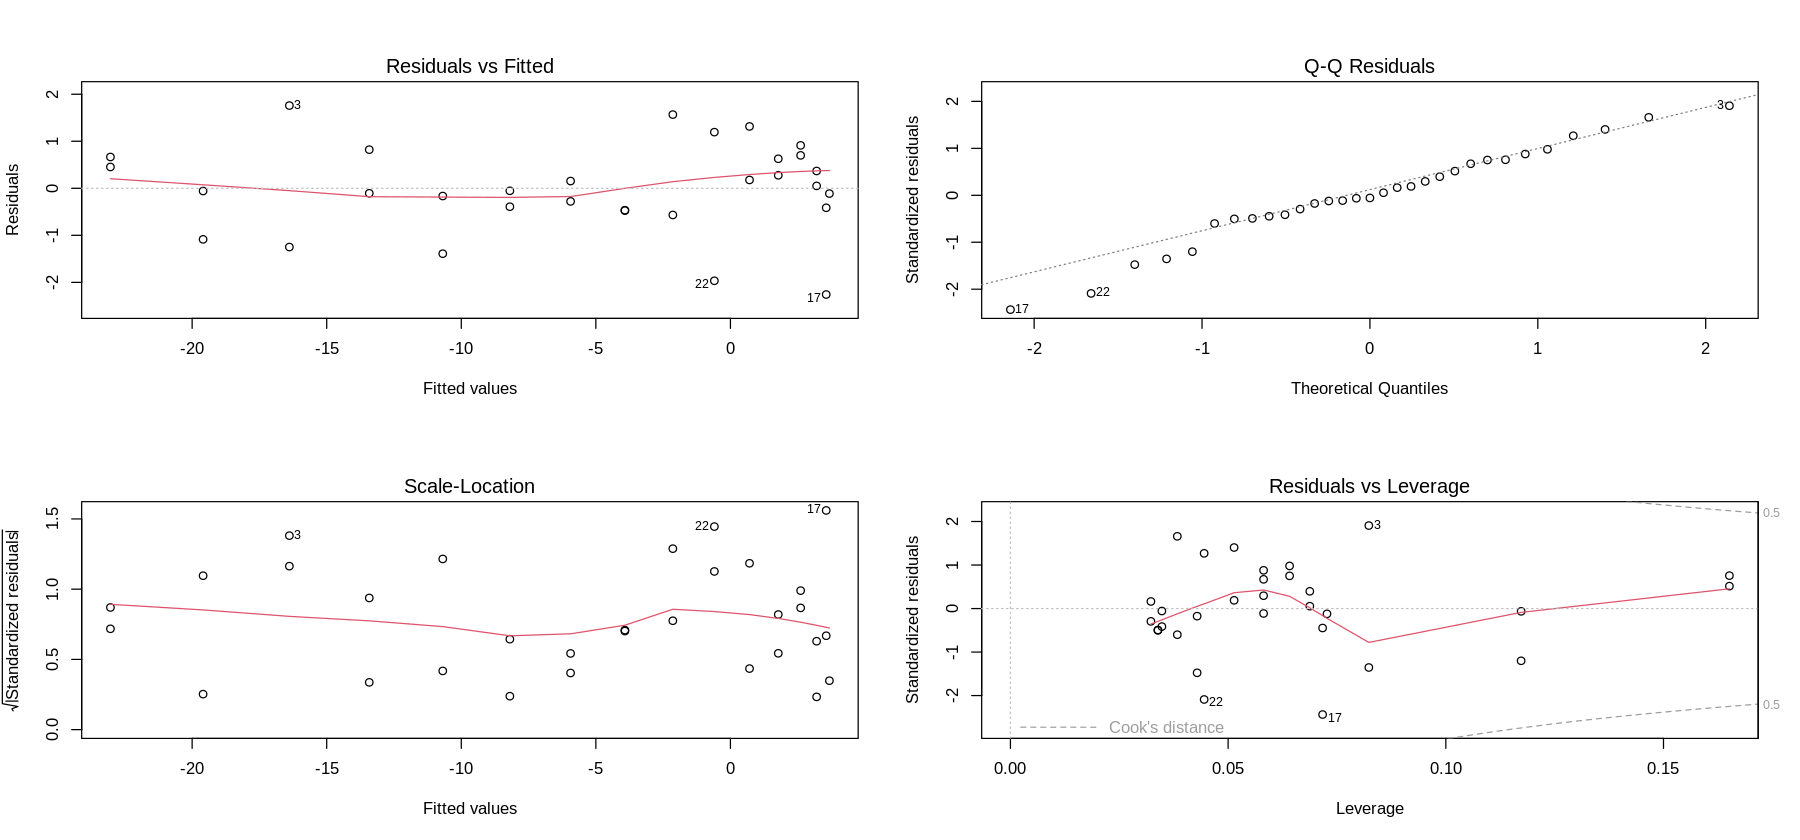

In [84]:
options(repr.plot.width=15, repr.plot.height=7)

par(mfrow = c(2, 2));
plot(lm(y~I(x^2)))

In [85]:
#model y = ax^2+bx+c
summary(lm(y~I(x^2)+x))


Call:
lm(formula = y ~ I(x^2) + x)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.22304 -0.55819 -0.00173  0.58115  1.81736 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.67726    0.24811  14.821 8.81e-15 ***
I(x^2)      -2.96810    0.05783 -51.323  < 2e-16 ***
x           -0.17881    0.09239  -1.935   0.0631 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9202 on 28 degrees of freedom
Multiple R-squared:  0.9895,	Adjusted R-squared:  0.9887 
F-statistic:  1319 on 2 and 28 DF,  p-value: < 2.2e-16


<h4> Zadanie3: Rozważ poniższe dane. Dokonaj transformacji zmiennych, a następnie zbuduj model liniowy w którym $R^2$ co najmniej $0.9$.

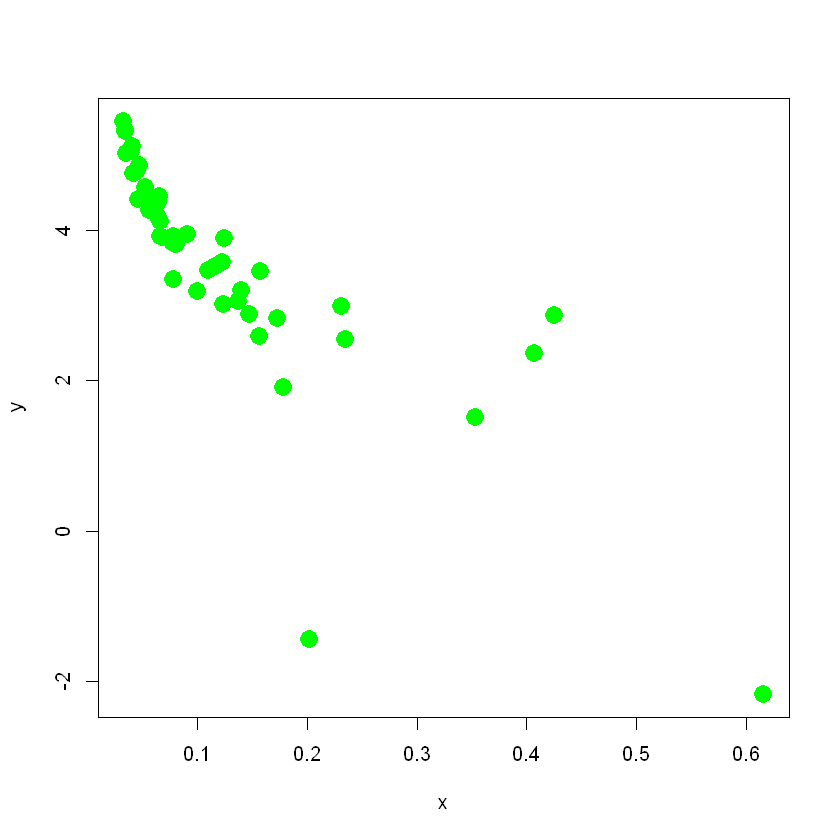

In [1]:
x = c(0.034, 0.078, 0.066, 0.038, 0.156, 0.425, 0.235, 0.056, 0.123, 0.059,
                   0.043, 0.064, 0.034, 0.110, 0.033, 0.140, 0.053, 0.157, 0.041, 0.202,
                   0.173, 0.078, 0.125, 0.062, 0.147, 0.137, 0.081, 0.124, 0.616, 0.068,
                   0.061, 0.040, 0.100, 0.045, 0.080, 0.066, 0.091, 0.178, 0.064, 0.077,
                   0.353, 0.047, 0.035, 0.042, 0.116, 0.231, 0.065, 0.046, 0.058, 0.407)


y = c(5.313, 3.346, 3.920, 5.050, 2.591, 2.867, 2.555, 4.263, 3.572, 4.346,
             4.762, 4.175, 5.332, 3.471, 5.452, 3.200, 4.569, 3.449, 5.111, -1.437,
             2.837, 3.917, 3.896, 4.240, 2.886, 3.055, 3.821, 3.020, -2.171, 3.910,
             4.349, 5.046, 3.191, 4.804, 3.818, 4.114, 3.953, 1.908, 4.372, 3.842,
             1.508, 4.862, 5.023, 4.755, 3.522, 2.992, 4.459, 4.408, 4.427, 2.363)

plot(x, y, cex = 2, col = "green", pch = 16)